In [3]:
                                 import pandas                                                                        as pd
                                 import numpy                                                                         as np
                                 import matplotlib.pyplot                                                             as plt
from statsmodels.tsa.api         import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics             import mean_squared_error
from IPython.display             import display
from pylab                       import rcParams
from datetime                    import datetime                                                                       as dt
from statsmodels.tsa.seasonal    import seasonal_decompose
from statsmodels.tsa.api         import ExponentialSmoothing, SimpleExpSmoothing, Holt
                                 import warnings       
                                 warnings.filterwarnings("ignore")
                                 import seaborn                                                                        as sns


## 1.Read the data as an appropriate Time Series data and plot the data.

In [225]:
sparkling=pd.read_csv("Sparkling.csv")

In [221]:
rose=pd.read_csv('Rose.csv')

In [222]:
print("------------------------------------------------------------------------")
print('Data Structure -Sparkling wine:') 
display(sparkling.head())
print("------------------------------------------------------------------------")
print("Info-Sparkling wine : \n")
display(sparkling.info())
print("------------------------------------------------------------------------")
print('Null values-Sparkling wine :')
display(sparkling.isnull().sum())
print("------------------------------------------------------------------------")
print('Data description-sparkling wine')
display(sparkling.describe())

------------------------------------------------------------------------
Data Structure -Sparkling wine:


,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


------------------------------------------------------------------------
Info-Sparkling wine : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


None

------------------------------------------------------------------------
Null values-Sparkling wine :


YearMonth    0
Sparkling    0
dtype: int64

------------------------------------------------------------------------
Data description-sparkling wine


,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [223]:
print("------------------------------------------------------------------------")
print('Data Structure-Rose wine :') 
display(rose.head())
print("------------------------------------------------------------------------")
print("Info : \n")
display(rose.info())
print("------------------------------------------------------------------------")
print('Null values :')
display(rose.Rose.isnull().sum())
print("------------------------------------------------------------------------")
print('Data description')
display(rose.describe())

------------------------------------------------------------------------
Data Structure-Rose wine :


,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


------------------------------------------------------------------------
Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


None

------------------------------------------------------------------------
Null values :


2

------------------------------------------------------------------------
Data description


,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


### Thus the 'Yearmonth' column is recognized as object, which needs to be converted into a datetime object.

In [233]:
# Method 1 : Loading the "YearMonth" column as datetime object at the begining
#converting the 'yearmonth' into a datetime object
sparking=pd.read_csv("Sparkling.csv", parse_dates=['YearMonth'], index_col='YearMonth')
roze=pd.read_csv("Rose.csv", parse_dates=["YearMonth"], index_col='YearMonth')

In [234]:
# Method 2 : converting the object datatype to datetime object and making it index
sparkling=pd.read_csv("Sparkling.csv")
sparkling["Year_Month"]=pd.to_datetime(sparkling["YearMonth"], format='%Y-%m')
sparkling=sparkling.drop(columns=["YearMonth"]).set_index(keys='Year_Month', drop=True)

rose=pd.read_csv('Rose.csv')
rose["Year_Month"]=pd.to_datetime(rose['YearMonth'], format='%Y-%m')
rose=rose.drop(columns=["YearMonth"]).set_index(keys="Year_Month", drop=True)

In [235]:
#Looking for nulll value in the data
a=sparkling.Sparkling.isna().sum()
print(f"The numbers of blank rows in the sparkling dataset is {a}")

b=rose.Rose.isna().sum()
print(f"The numbers of blank rows in the rose dataset is {b}- the list of which are as below:")

rose[rose.Rose.isna()].index

The numbers of blank rows in the sparkling dataset is 0
The numbers of blank rows in the rose dataset is 2- the list of which are as below:


DatetimeIndex(['1994-07-01', '1994-08-01'], dtype='datetime64[ns]', name='Year_Month', freq=None)

In [236]:
# Interpolating the missing data

rose.loc[['1994-07-01', '1994-08-01']]=rose.interpolate(method='spline',order=3).loc[['1994-07-01', '1994-08-01']]

No handles with labels found to put in legend.


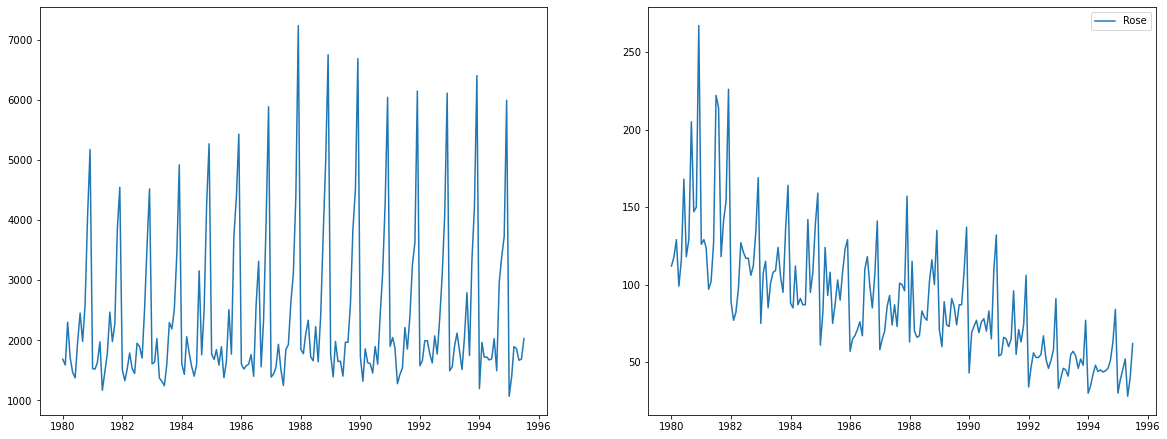

In [212]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7.5))

ax1.plot(sparkling.index, sparkling.Sparkling, label='Sparkling')
plt.legend(loc='best')
ax2.plot(rose.index, rose.Rose, label="Rose")
plt.legend(loc='best')

plt.show()


## 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

<AxesSubplot:xlabel='Year_Month', ylabel='Rose'>

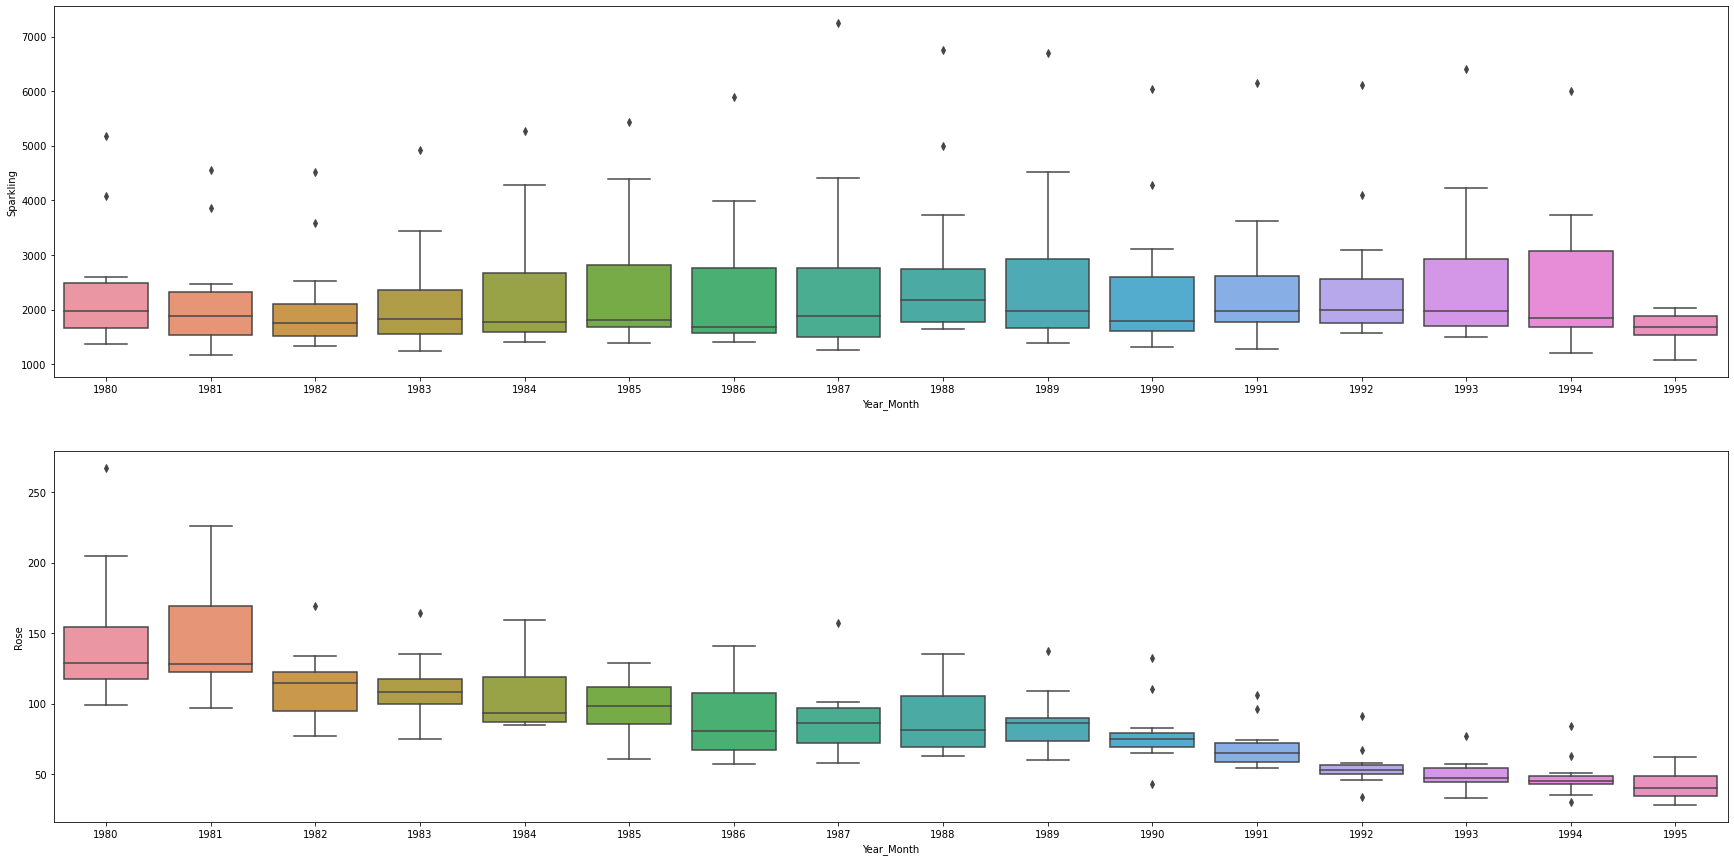

In [12]:
## EDA- plotting yearly plot of wine production


fig,(ax1,ax2)=plt.subplots(2,1,figsize=(30,15))

sns.boxplot(sparkling.index.year,sparkling.Sparkling, ax=ax1)
#ax1.title()
sns.boxplot(rose.index.year,rose.Rose, ax=ax2)
#ax2.title("boxplot of yearly production of Rose wine")

The plot indicates that the median sale level for :
    (a) Sparkling wine had remained almost static between 1980-1994.It has started falling in 1995.The total production level was also fluctuating  as there were exceptional months where the production level can be called outllier.
    (b)Rose wine production had been continually decreasing since 1980.There had been occassional overproduction as evident from the upper outliers during 1990,1991, 1992 etc.

In [13]:
## EDA- plotting boxplot for monthly wine production

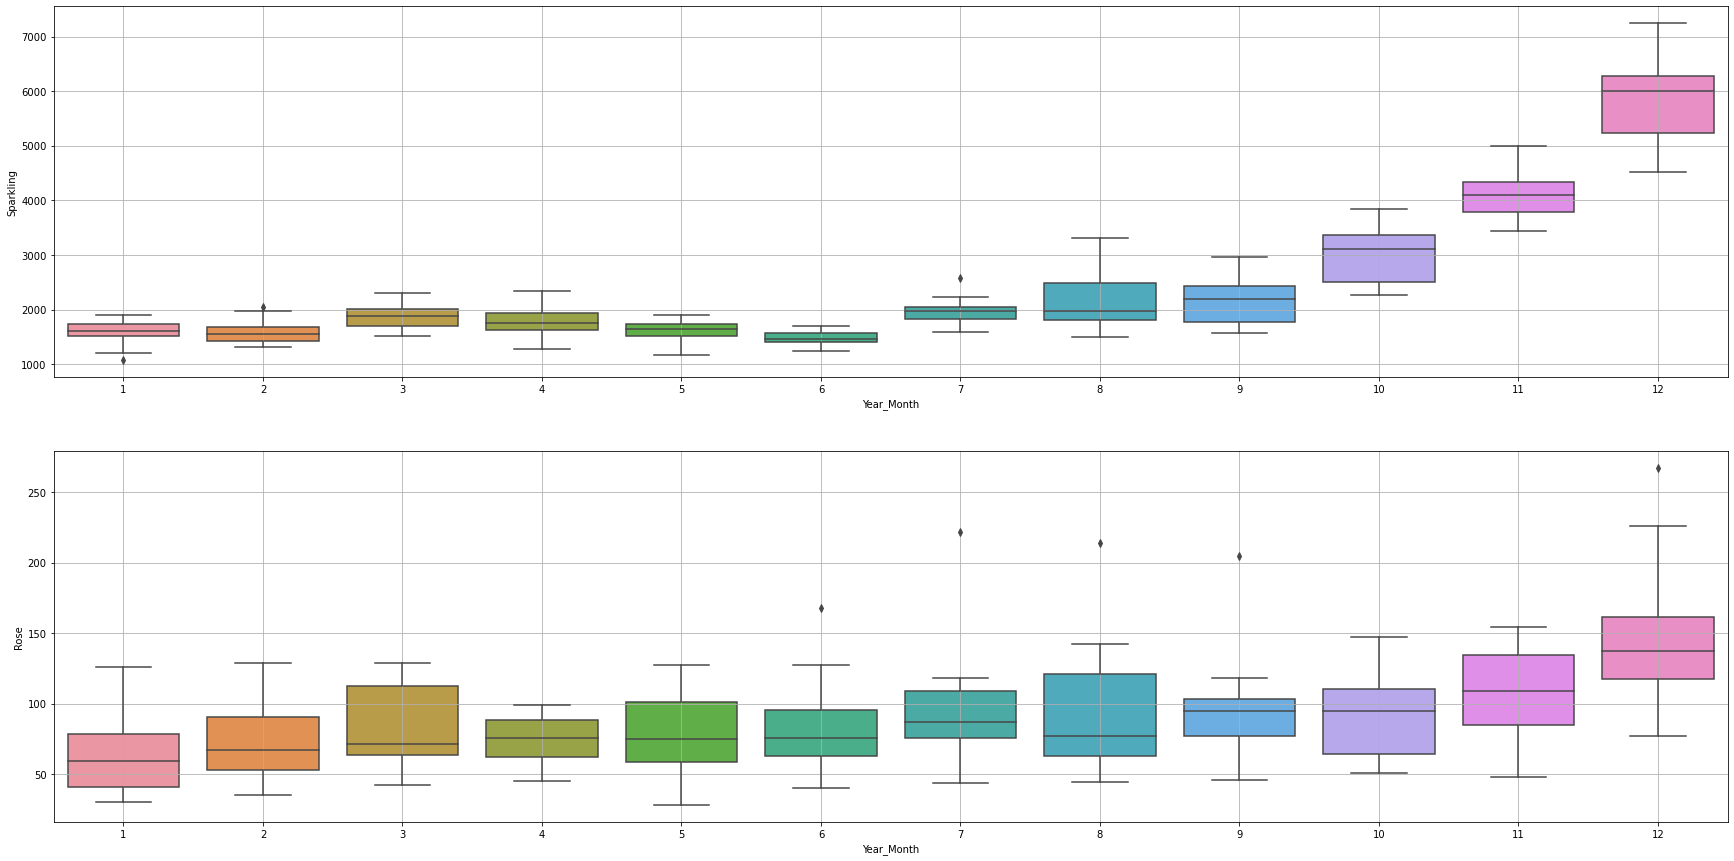

In [14]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(30,15))

sns.boxplot(sparkling.index.month,sparkling.Sparkling, ax=ax1)
ax1.grid()
sns.boxplot(rose.index.month,rose.Rose, ax=ax2)
ax2.grid()

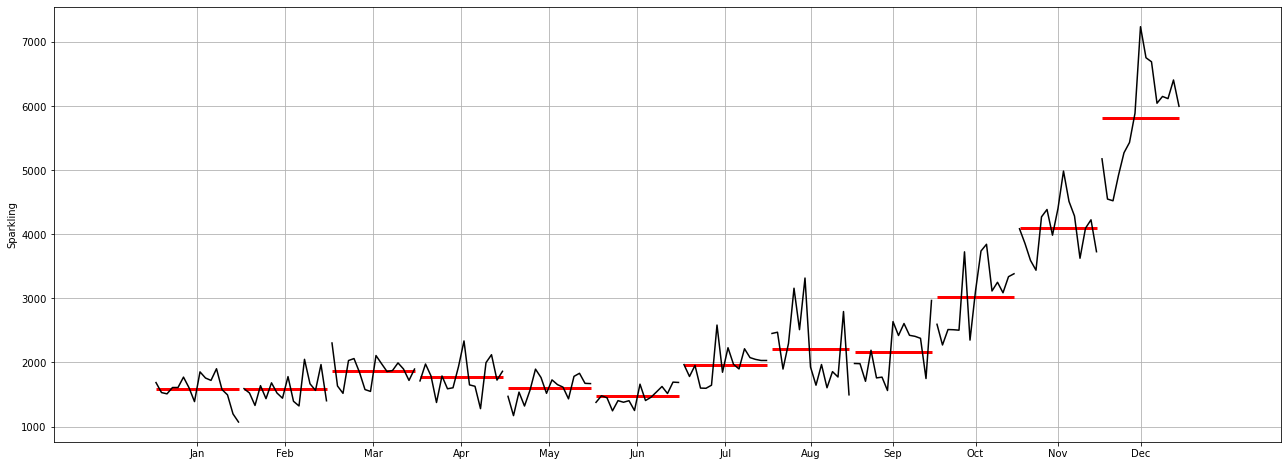

In [15]:
# Month-plot
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(sparkling,ylabel='Sparkling',ax=ax)
plt.grid();

 From the plot above the trend of sparkling wine production, it appears that sales  level between January to September had been static, but secularly increasing between september-December with occassional variations.

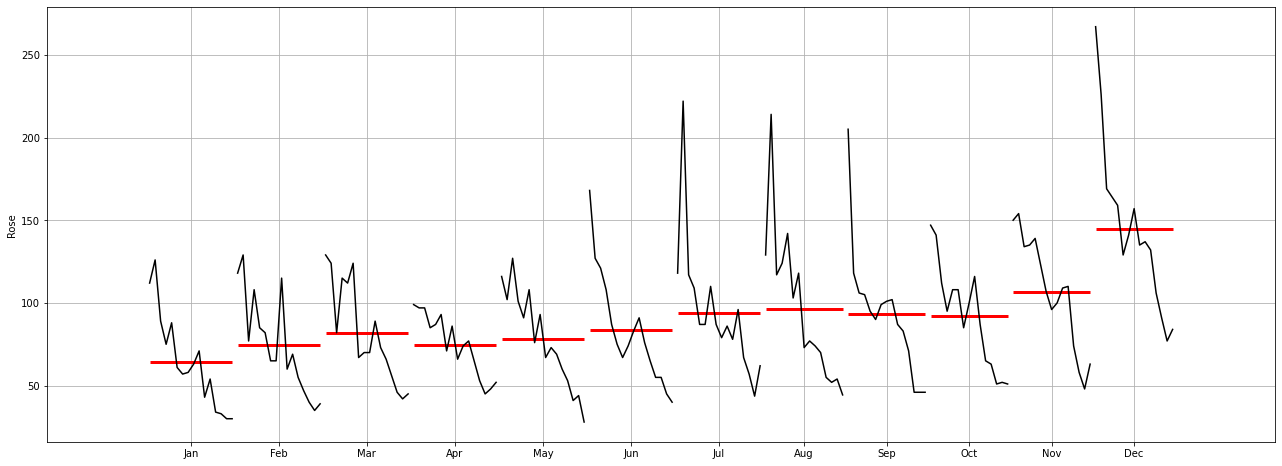

In [16]:
# Month-plot
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(rose,ylabel='Rose',ax=ax)
plt.grid();

The level of rose wine production has not shown any significant change in any month except in December, when the level of production had increased in almost every year.

## Monthly distribution for Sparkling wine

In [177]:
sparkling_pivot=pd.pivot_table(sparkling, values='Sparkling', columns=sparkling.index.month, index=sparkling.index.year)

In [39]:
sparkling_pivot

Year_Month,1,2,3,4,5,6,7,8,9,10,11,12
Year_Month,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


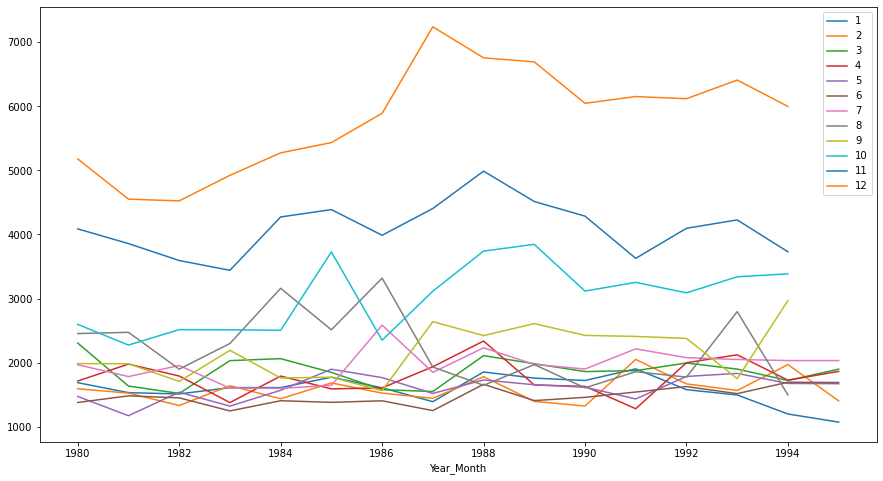

In [229]:
sparkling_pivot.plot(label="sparkling_sales")
plt.legend(loc='best')

<AxesSubplot:>

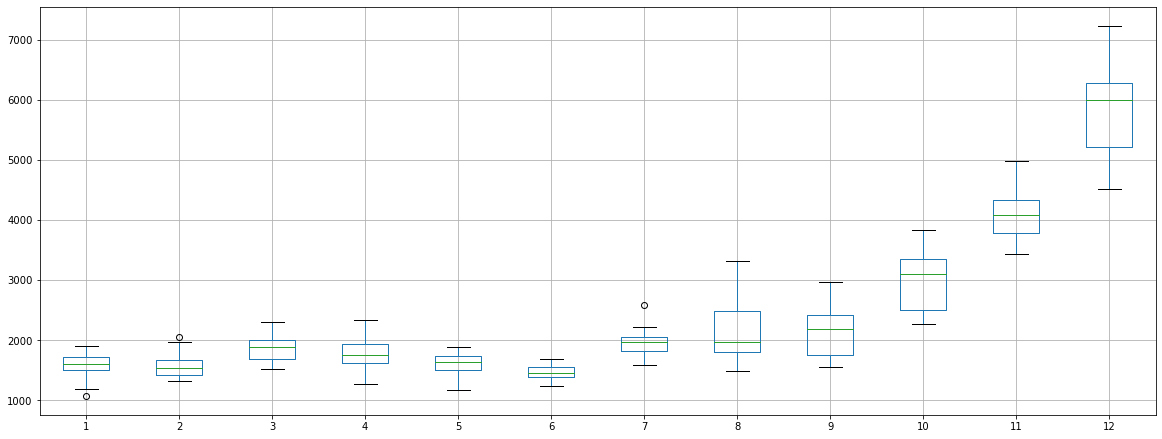

In [178]:
sparkling_pivot.boxplot(figsize=(20, 7.5))

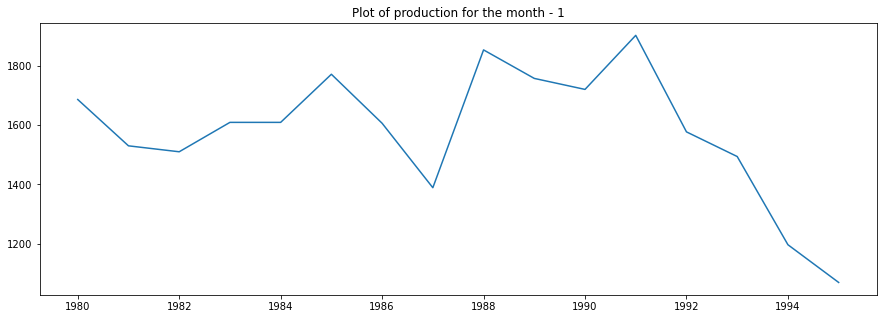

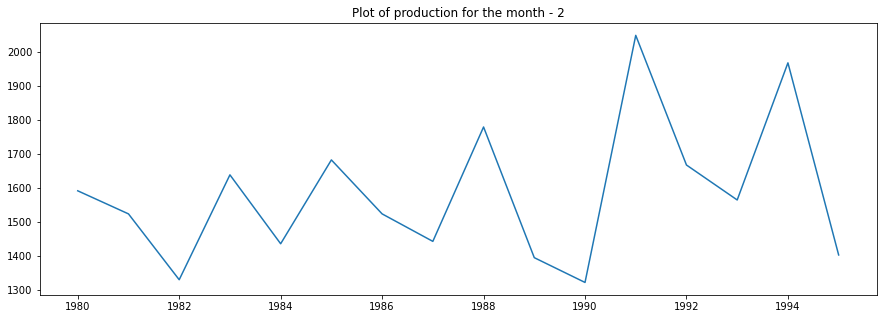

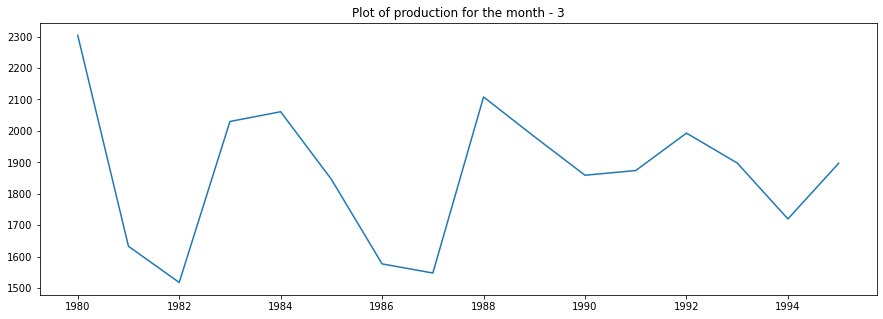

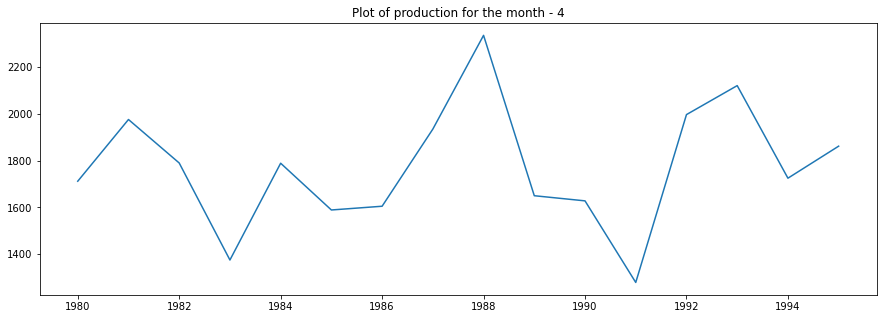

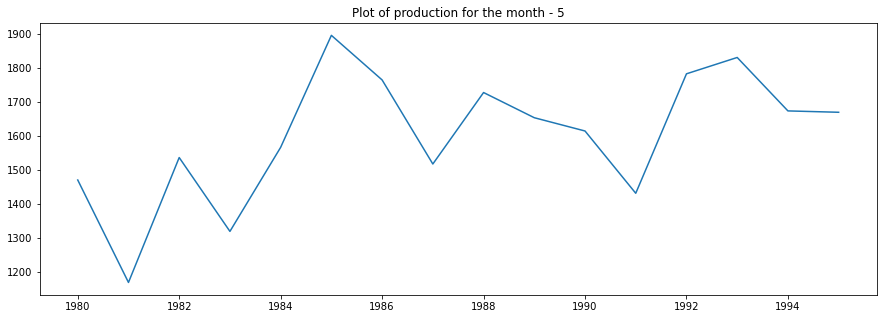

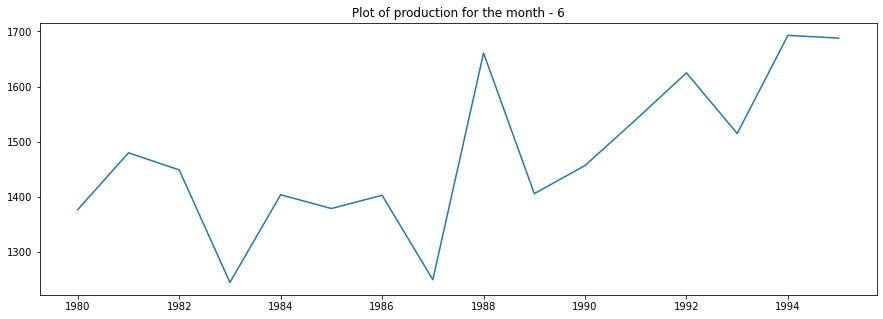

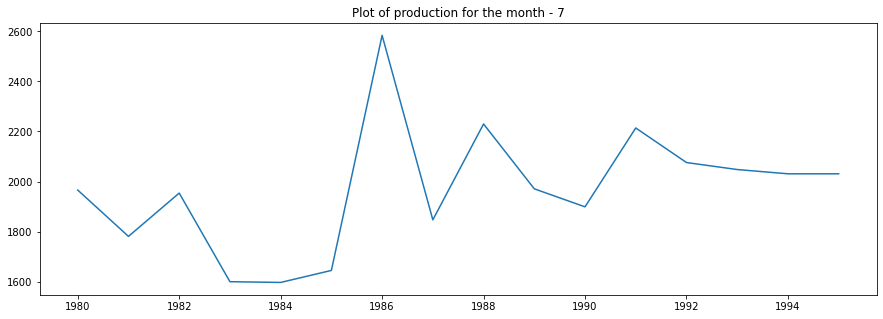

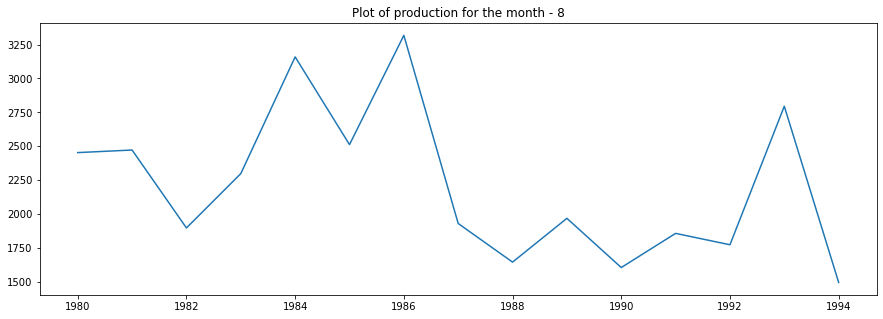

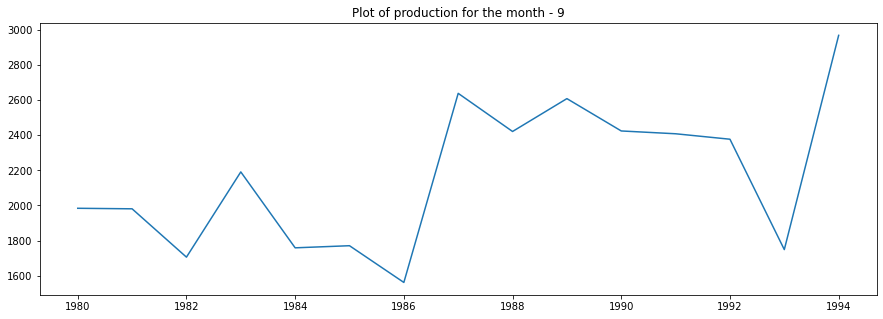

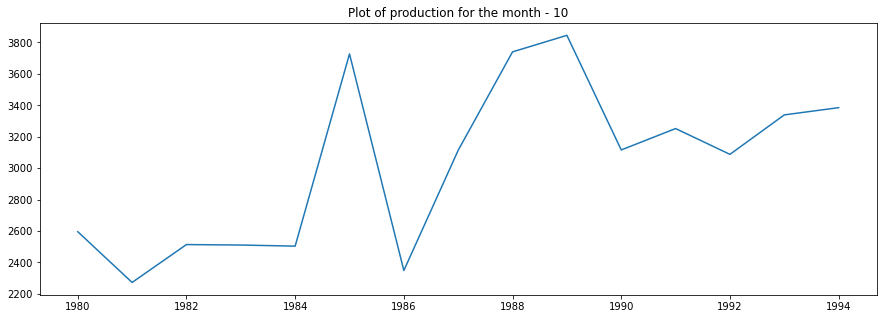

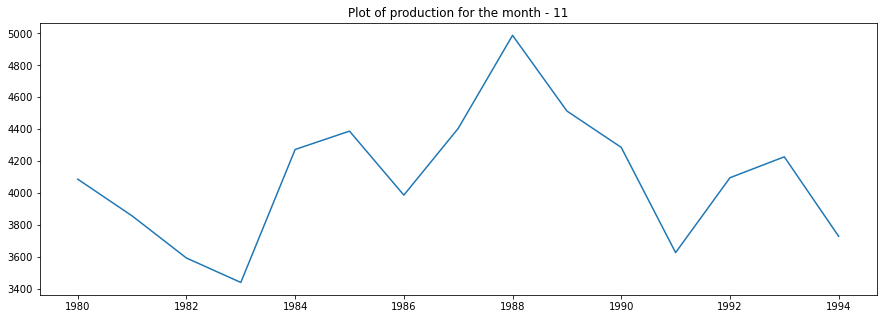

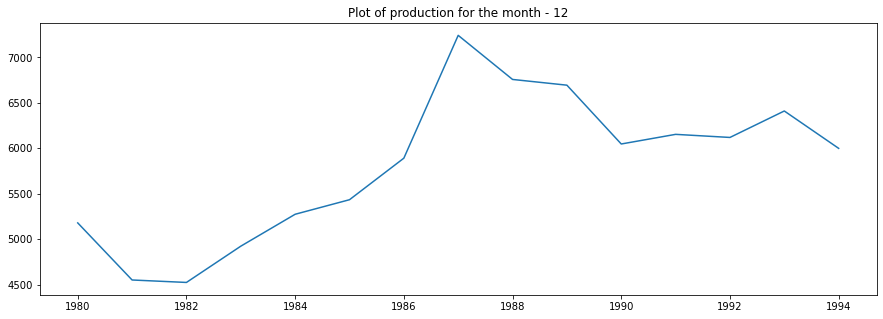

In [20]:
for i in range(0,len(sparkling_pivot.columns)):
    plt.figure(figsize=(15,5))
    plt.subplots=(12,1, i+1)
    plt.plot(sparkling_pivot[sparkling_pivot.columns[i]])
    plt.title(f"Plot of production for the month - {sparkling_pivot.columns[i]}")

## Monthly distribution for Rose wine

In [40]:
rose_pivot=pd.pivot_table(rose, values='Rose', index=rose.index.year, columns=rose.index.month)

<AxesSubplot:xlabel='Year_Month'>

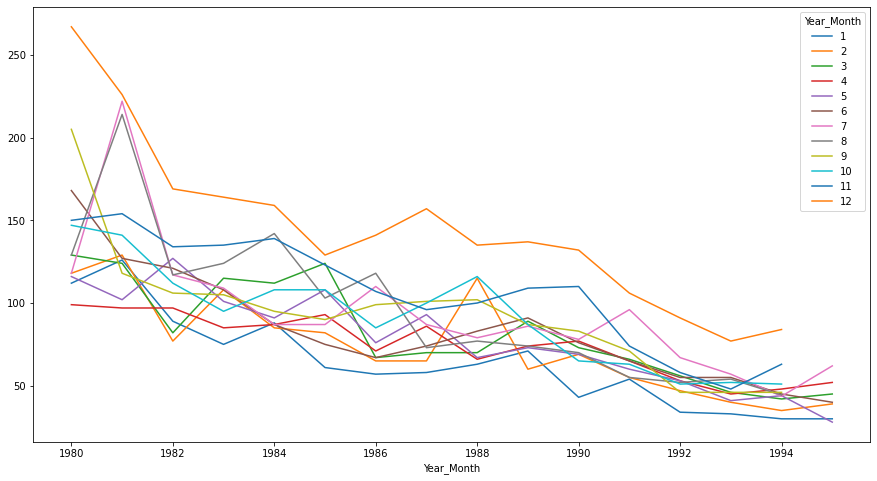

In [230]:
rose_pivot.plot()

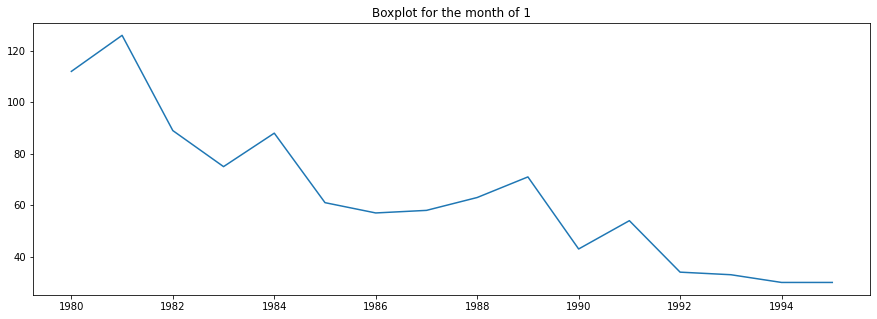

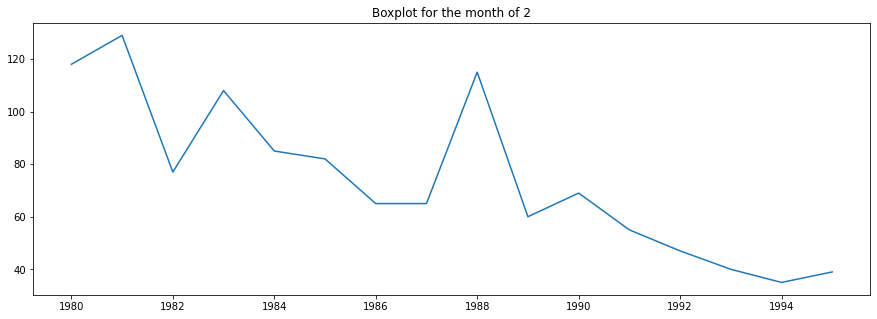

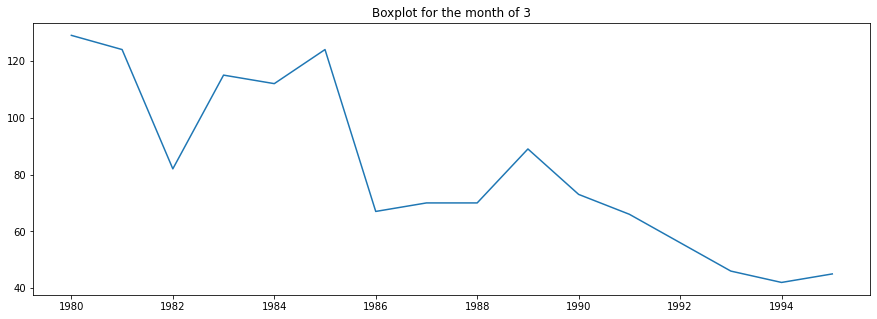

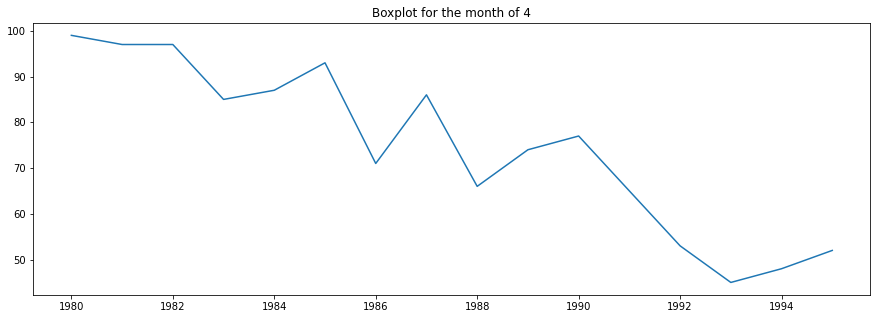

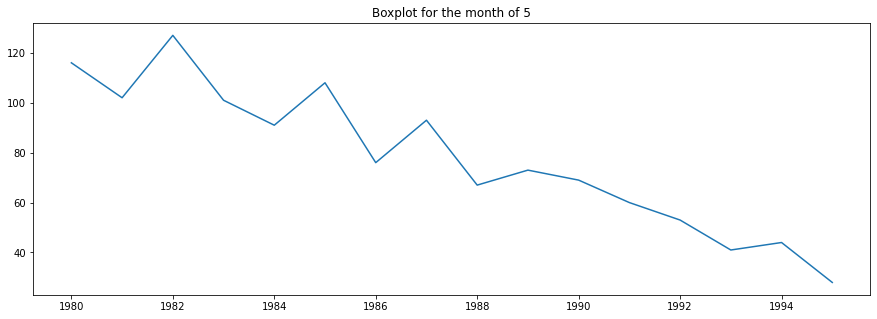

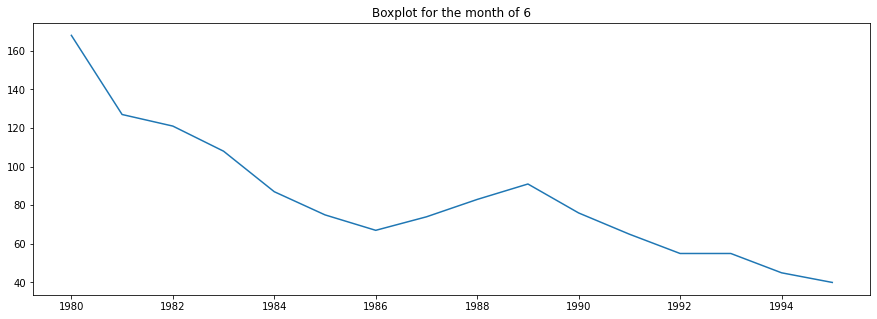

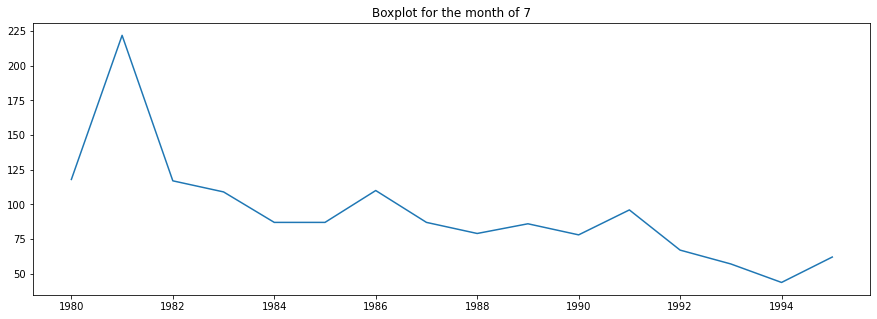

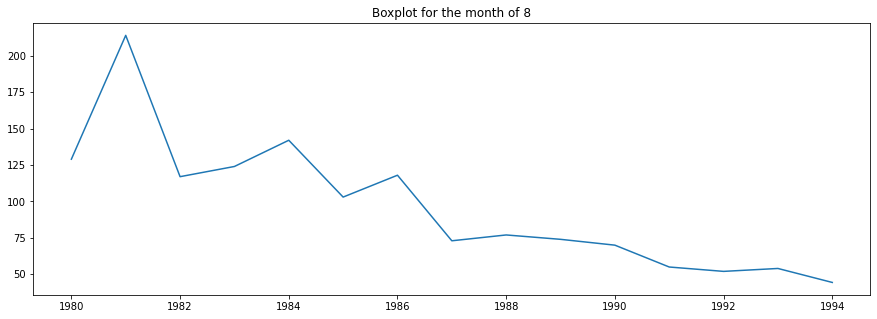

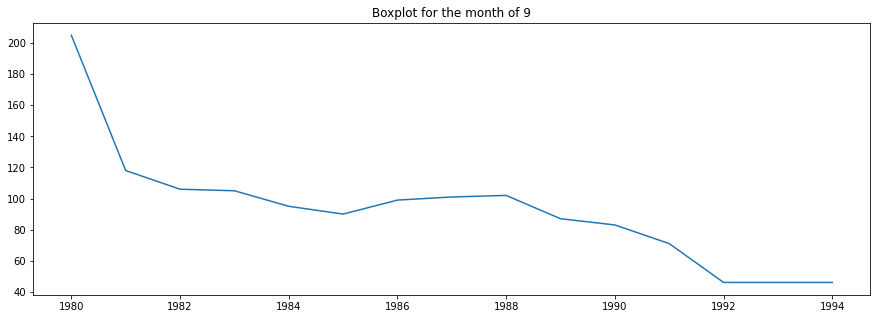

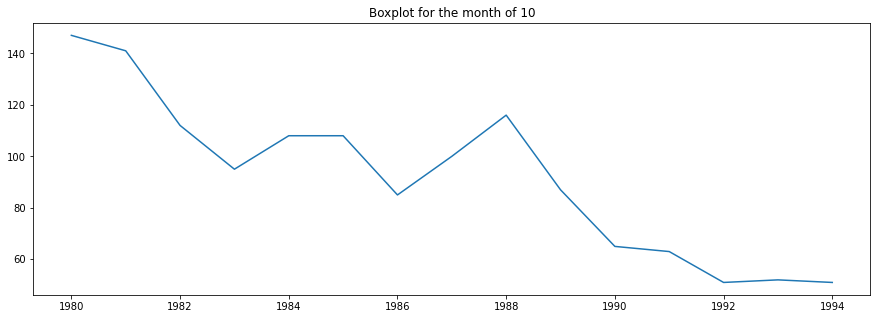

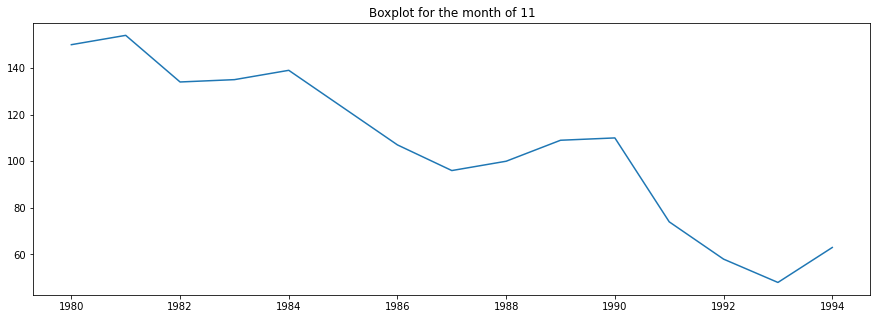

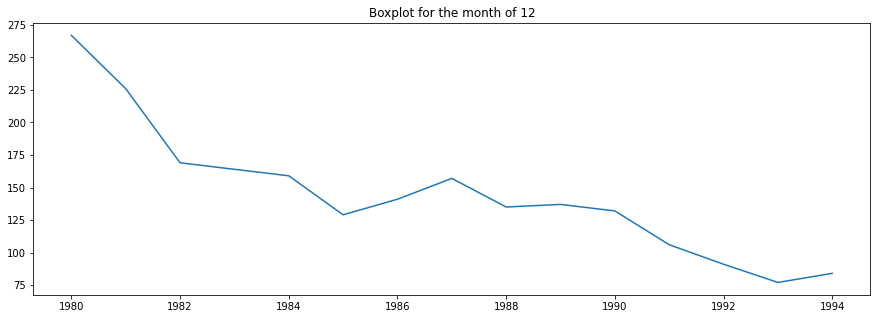

In [22]:
for i in range (0,len(rose_pivot.columns)):
    plt.figure(figsize=(15,5))
    plt.subplots=(12,1,i+1)
    plt.plot(rose_pivot[rose_pivot.columns[i]])
    plt.title("Boxplot for the month of {}". format(rose_pivot.columns[i]))
    

<AxesSubplot:>

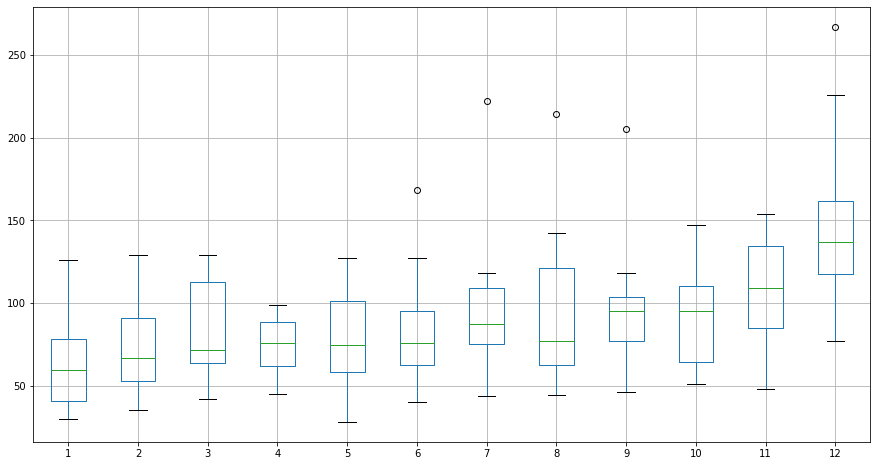

In [23]:
rose_pivot.boxplot(figsize=(15,8))

## Seasonal Decomposition-Sparkling wine

### additive

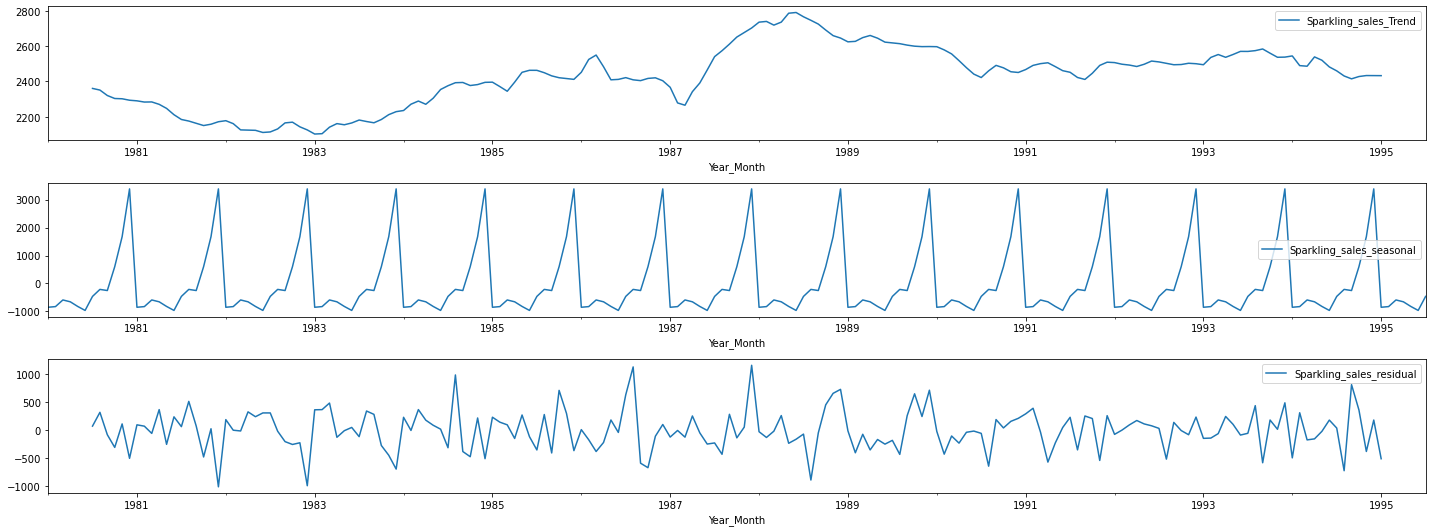

In [21]:

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 7.5))
decomposition = seasonal_decompose(sparkling.Sparkling, model='additive', period=12)
decomposition.trend.plot(ax=ax1, label='Sparkling_sales_Trend')
decomposition.seasonal.plot(ax=ax2, label='Sparkling_sales_seasonal')
decomposition.resid.plot(ax=ax3, label='Sparkling_sales_residual')

ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()
plt.show()


### Multiplicative

In [224]:
sparkling

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471
...,...,...
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688


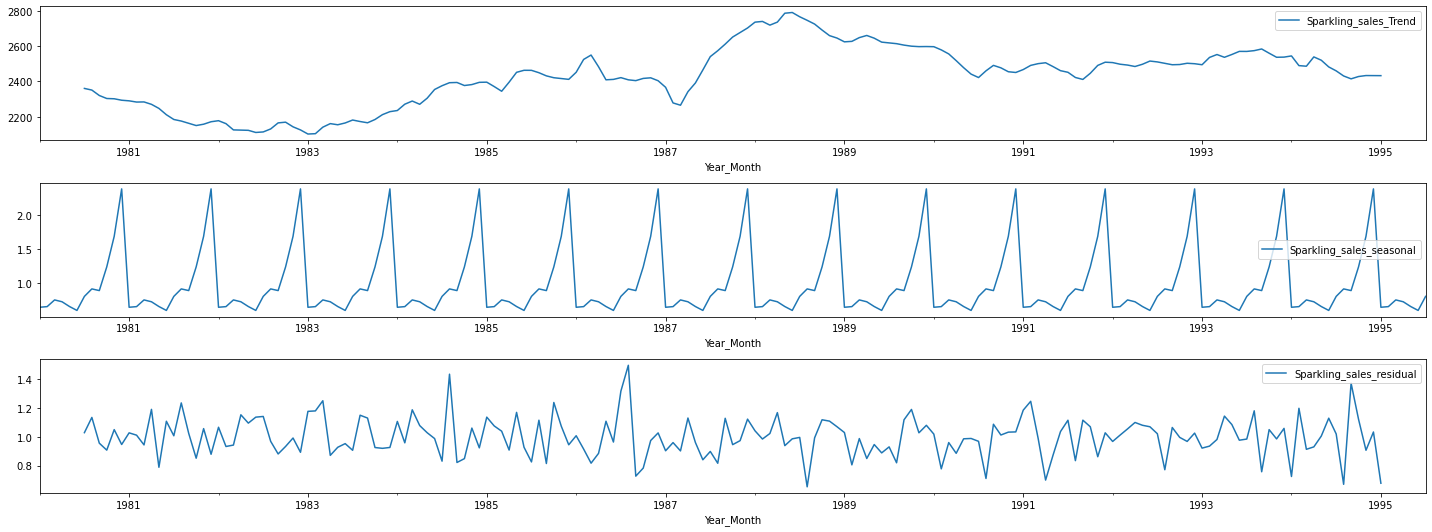

In [23]:

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 7.5))
decomposition = seasonal_decompose(sparkling.Sparkling, model='multiplicative', period=12)
decomposition.trend.plot(ax=ax1, label='Sparkling_sales_Trend')
decomposition.seasonal.plot(ax=ax2, label='Sparkling_sales_seasonal')
decomposition.resid.plot(ax=ax3, label='Sparkling_sales_residual')

ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()
plt.show()


### from the above two plots, additive decomposition seems more relevant as the residuals seem to be uniformly distributed around 0 in the additive case as compared to 1 in the multiplicative case.

## Seasonal Decomposition-Rose wine

### additive

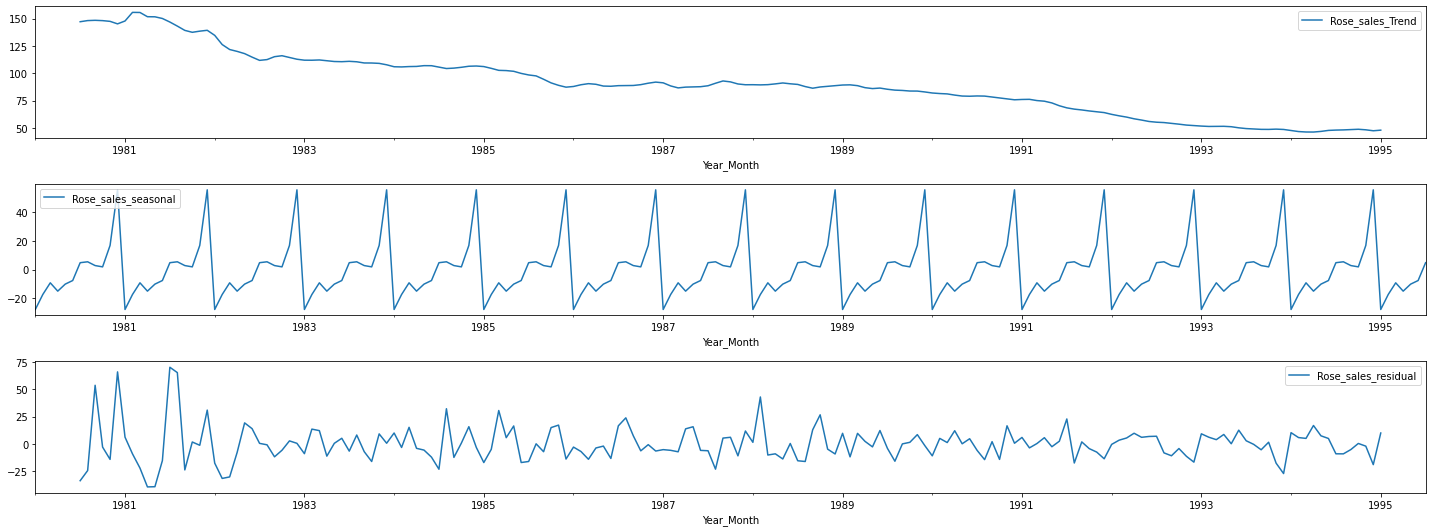

In [25]:

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 7.5))
decomposition = seasonal_decompose(rose.Rose, model='additive', period=12)
decomposition.trend.plot(ax=ax1, label='Rose_sales_Trend')
decomposition.seasonal.plot(ax=ax2, label='Rose_sales_seasonal')
decomposition.resid.plot(ax=ax3, label='Rose_sales_residual')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')

plt.tight_layout()
plt.show()


In [26]:
### Multiplicative

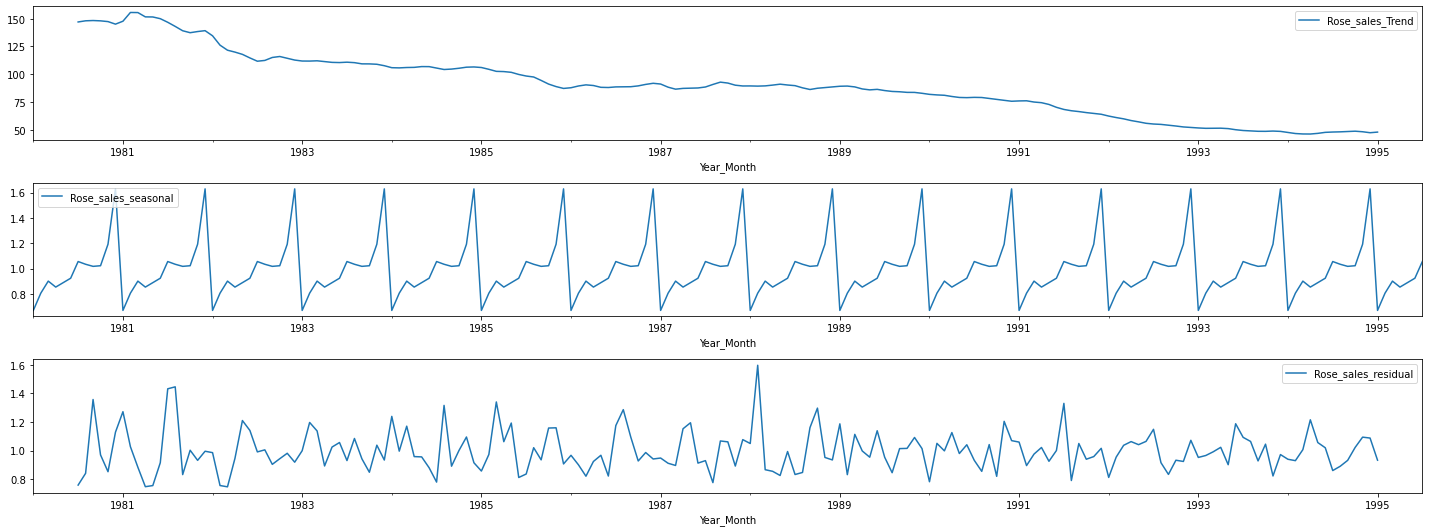

In [28]:

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 7.5))
decomposition = seasonal_decompose(rose.Rose, model='multiplicative', period=12)
decomposition.trend.plot(ax=ax1, label='Rose_sales_Trend')
decomposition.seasonal.plot(ax=ax2, label='Rose_sales_seasonal')
decomposition.resid.plot(ax=ax3, label='Rose_sales_residual')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')

plt.tight_layout()
plt.show()


### from the above two plots, additive decomposition seems more relevant as the residuals seem to be uniformly distributed around 0 in the additive case as compared to 1 in the multiplicative case.

## 3-Split the data into training and test. The test data should start in 1991.

In [432]:
train_spark=sparkling[sparkling.index<'1991']
test_spark=sparkling[sparkling.index >='1991']

In [433]:
print('Head of train data')
display(train_spark.head())
print('Head of test data')
display(test_spark.head())
print('tail of train data')
display(train_spark.tail())
print('tail of train data')
display(test_spark.tail())

Head of train data


,Sparkling
Year_Month,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Head of test data


,Sparkling
Year_Month,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


tail of train data


,Sparkling
Year_Month,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


tail of train data


,Sparkling
Year_Month,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [434]:
train_rose=rose[rose.index<'1991']
test_rose=rose[rose.index >='1991']

In [435]:
print('Head of train data')
display(train_rose.head())
print('Head of test data')
display(test_rose.head())
print('tail of train data')
display(train_rose.tail())
print('tail of train data')
display(test_rose.tail())

Head of train data


,Rose
Year_Month,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Head of test data


,Rose
Year_Month,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


tail of train data


,Rose
Year_Month,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


tail of train data


,Rose
Year_Month,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


The first line selects all rows of df that have a date before January 1, 1991, and assigns them to the variable train. The second line selects all rows of df that have a date on or after January 1, 1991, and assigns them to the variable test.

## 4-Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [436]:
#creating an empty dataframe to store the model results
Results_sparkling=pd.DataFrame({"Method":[], "RMSE_score":[]})
Results_rose=pd.DataFrame({"Method":[], "RMSE_score":[]})

### Model 1 : Regression

In [437]:
#Regression model
from sklearn.linear_model import LinearRegression
lr_spark=LinearRegression()
lr_rose=LinearRegression()

In [438]:
#creating copies of the train and test data
lrtrain_spark=train_spark.copy()
lrtest_spark=test_spark.copy()

In [439]:
lrtrain_rose=train_rose.copy()
lrtest_rose=test_rose.copy()

In [440]:
lrtrain_spark['Month']=[i+1 for i in range(len(lrtrain_spark))]
lrtest_spark['Month']=[i+133 for i in range(len(lrtest_spark))]

In [441]:
lrtrain_rose['Month']=[i+1 for i in range(len(lrtrain_rose))]
lrtest_rose['Month']=[i+133 for i in range(len(lrtest_rose))]

In [442]:
lr_spark.fit(lrtrain_spark[['Month']],lrtrain_spark.Sparkling)

LinearRegression()

In [443]:
lr_rose.fit(lrtrain_rose[['Month']],lrtrain_rose.Rose)

LinearRegression()

In [444]:
lrtest_spark['Predicted']=lr_spark.predict(lrtest_spark[['Month']])

In [445]:
lrtest_rose['Predicted']=lr_rose.predict(lrtest_rose[['Month']])

In [446]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

Text(0.5, 1.0, 'Prediction of Sparkling wine production using Linear regression')

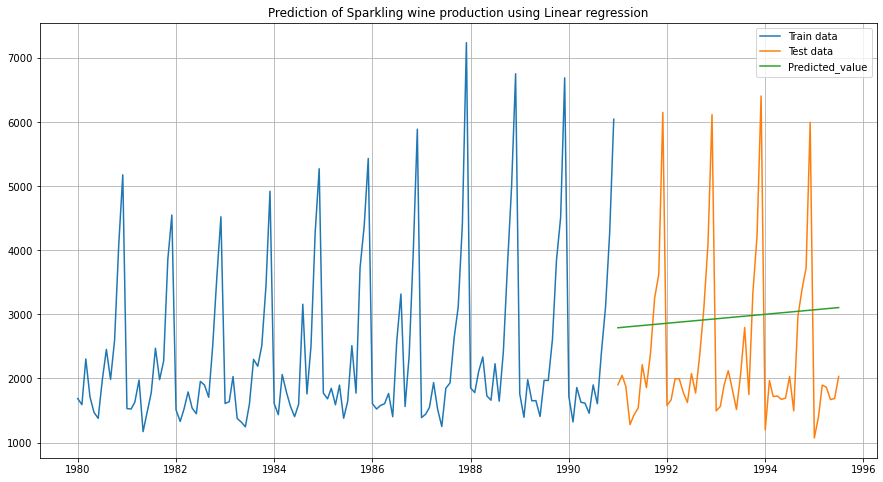

In [447]:
#plotting the result of regression model
plt.plot(lrtrain_spark.Sparkling, label="Train data")
plt.plot(lrtest_spark.Sparkling, label= "Test data")
plt.plot(lrtest_spark['Predicted'], label="Predicted_value")
plt.legend()
plt.grid()
plt.title("Prediction of Sparkling wine production using Linear regression")

From the above it appears that there is wide intrayear fluctuations.Regression does not seem to be fitting very well here.

Text(0.5, 1.0, 'Prediction of Rose wine production using Linear regression')

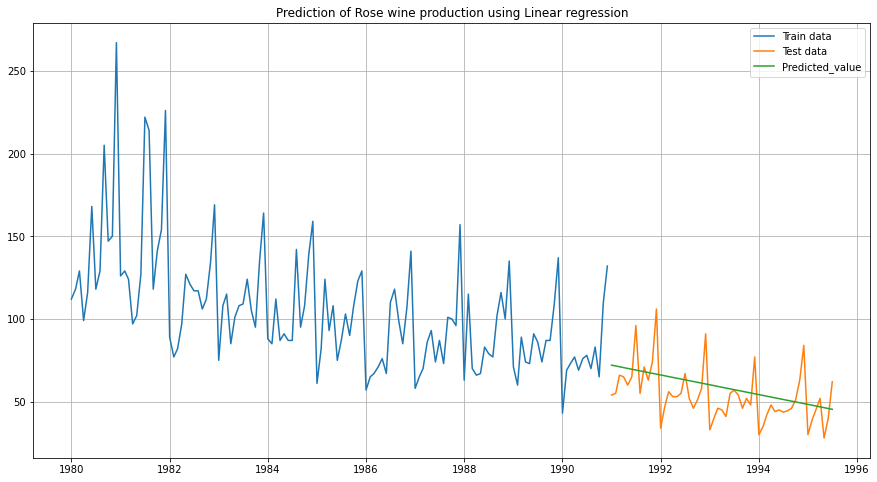

In [448]:
#plotting the result of regression model
plt.plot(lrtrain_rose.Rose, label="Train data")
plt.plot(lrtest_rose.Rose, label= "Test data")
plt.plot(lrtest_rose['Predicted'], label="Predicted_value")
plt.legend()
plt.grid()
plt.title("Prediction of Rose wine production using Linear regression")

Since there is lesser intra year fluctuation in the production of rose wine as compared to sparkling wine, linear regression may perform better.

In [449]:
#checking the RMSE score for the LR output
LR_sparkling_score=np.sqrt(mean_squared_error(lrtest_spark.Sparkling,lrtest_spark['Predicted']))

In [450]:
#checking the RMSE score for the LR output
LR_rose_score=np.sqrt(mean_squared_error(lrtest_rose.Rose,lrtest_rose['Predicted']))

In [451]:
Results_sparkling=Results_sparkling.append({"Method":'LR_sparkling_score', "RMSE_score":LR_sparkling_score},ignore_index=True)

In [452]:
Results_rose=Results_rose.append({"Method":'LR_sparkling_score', "RMSE_score":LR_rose_score},ignore_index=True)

In [453]:
display(Results_sparkling)
display(Results_rose)

,Method,RMSE_score
0,LR_sparkling_score,1389.135175


,Method,RMSE_score
0,LR_sparkling_score,15.291197


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### a. Sparkling wine

In [454]:
naive=train_spark.iloc[-1,-1]#creating the naive variable having the value set to last data in the train set
test_spark['Predicted_Naive']=naive # setting the entire test set value as that of naive i.e. the last data in train set.

Text(0.5, 1.0, 'Predicted test data for Naive Approach-sparkling')

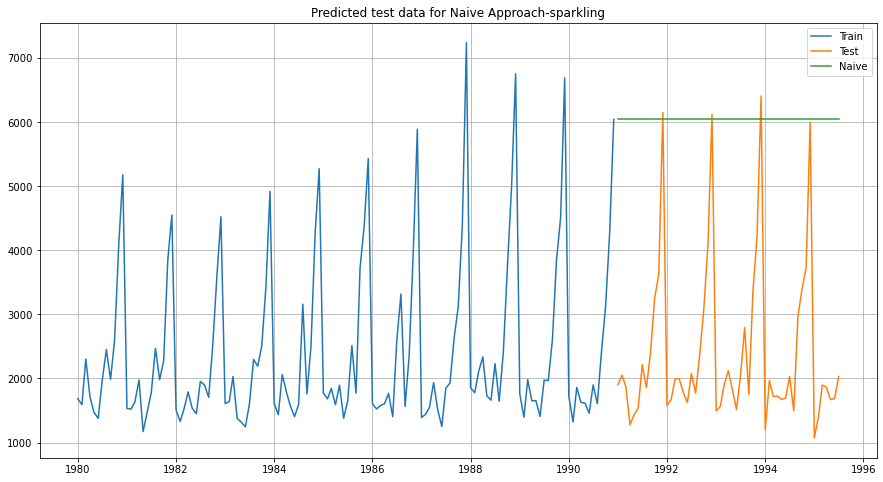

In [455]:
plt.plot(train_spark.Sparkling, label="Train")
plt.plot(test_spark.Sparkling, label="Test")
plt.plot(test_spark.Predicted_Naive, label='Naive')
plt.grid()
plt.legend()
plt.title("Predicted test data for Naive Approach-sparkling")

In [456]:
# checking the RMSE score 
Naive_score=np.sqrt(mean_squared_error(test_spark.Sparkling,test_spark.Predicted_Naive))
Results_sparkling=Results_sparkling.append({"Method":'Naive_score', "RMSE_score":Naive_score},ignore_index=True)

In [457]:
Results_sparkling

,Method,RMSE_score
0,LR_sparkling_score,1389.135175
1,Naive_score,3864.279352


#### b. Rose wine

In [458]:
naive=train_rose.iloc[-1,-1]#creating the naive variable having the value set to last data in the train set
test_rose['Predicted_Naive']=naive # setting the entire test set value as that of naive i.e. the last data in train set.

Text(0.5, 1.0, 'Predicted test data for Naive Approach-Rose')

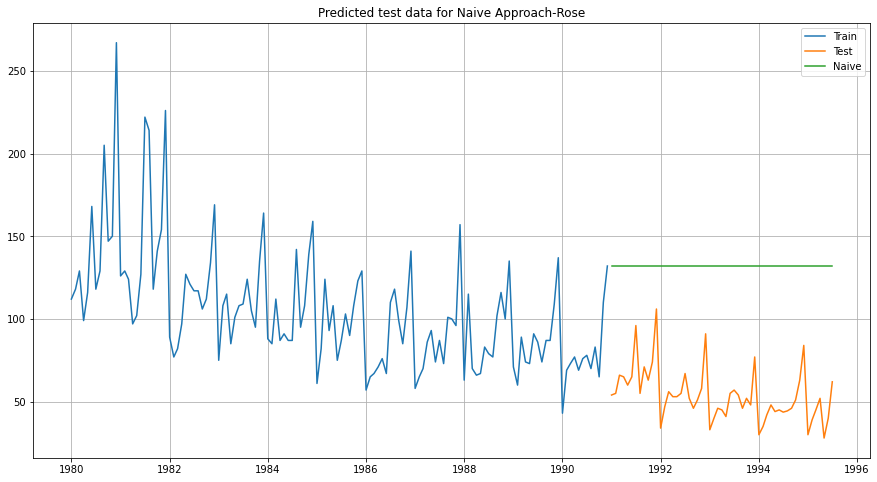

In [459]:
plt.plot(train_rose.Rose, label="Train")
plt.plot(test_rose.Rose, label="Test")
plt.plot(test_rose.Predicted_Naive, label='Naive')
plt.grid()
plt.legend()
plt.title("Predicted test data for Naive Approach-Rose")

In [460]:
# checking the RMSE score 
Naive_score=np.sqrt(mean_squared_error(test_rose.Rose,test_rose.Predicted_Naive))
Results_rose=Results_rose.append({"Method":'Naive_score', "RMSE_score":Naive_score},ignore_index=True)

In [461]:
Results_rose

,Method,RMSE_score
0,LR_sparkling_score,15.291197
1,Naive_score,79.777253


## Model 3: Simple Average

#### a. Sparkling wine

In [462]:
test_spark['Simple Average']=train_spark['Sparkling'].mean()

Text(0.5, 1.0, 'Predicted test data for -Simple Average-sparkling')

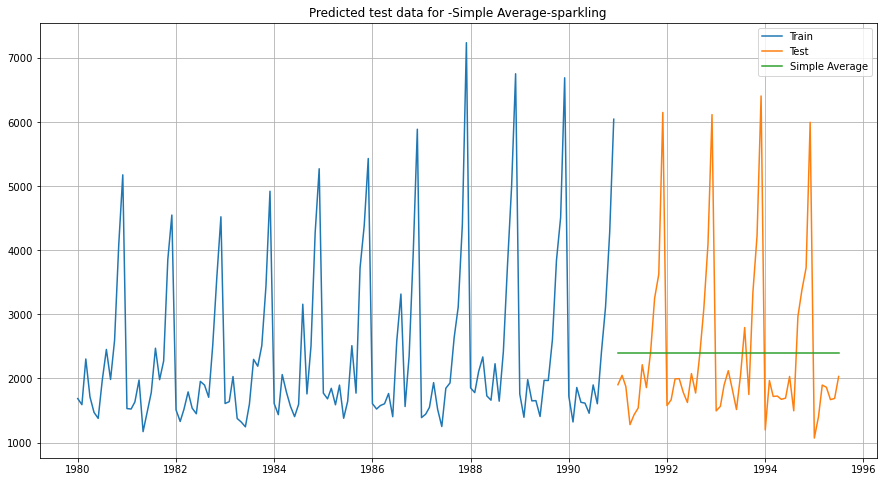

In [463]:
plt.plot(train_spark.Sparkling, label="Train")
plt.plot(test_spark.Sparkling, label="Test")
plt.plot(test_spark['Simple Average'], label='Simple Average')
plt.grid()
plt.legend()
plt.title("Predicted test data for -Simple Average-sparkling")

In [464]:
avg_score=np.sqrt(mean_squared_error(test_spark.Sparkling,test_spark['Simple Average']))
Results_sparkling=Results_sparkling.append({"Method":'Simple_Average', "RMSE_score":avg_score},ignore_index=True)

In [465]:
Results_sparkling

,Method,RMSE_score
0,LR_sparkling_score,1389.135175
1,Naive_score,3864.279352
2,Simple_Average,1275.081804


#### b. Rose wine

In [466]:
test_rose['Simple Average']=train_rose['Rose'].mean()

Text(0.5, 1.0, 'Predicted test data for -Simple Average-Rose')

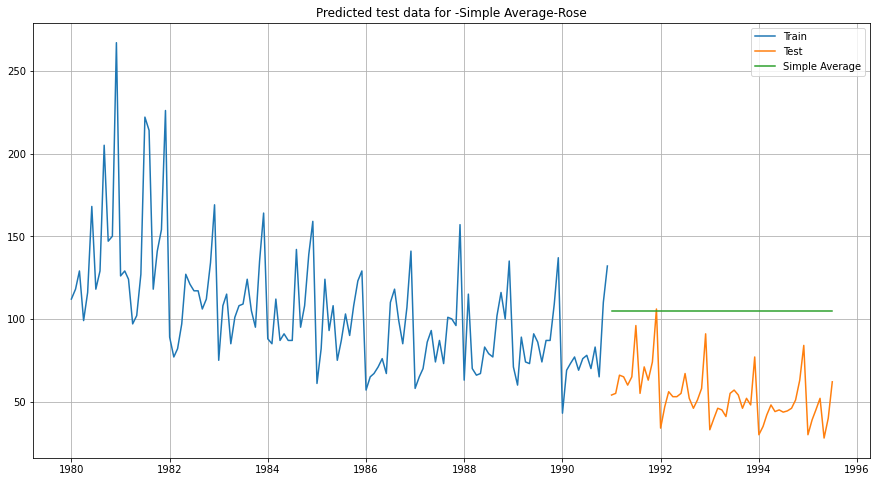

In [467]:
plt.plot(train_rose.Rose, label="Train")
plt.plot(test_rose.Rose, label="Test")
plt.plot(test_rose['Simple Average'], label='Simple Average')
plt.grid()
plt.legend()
plt.title("Predicted test data for -Simple Average-Rose")

In [468]:
avg_score=np.sqrt(mean_squared_error(test_rose.Rose,test_rose['Simple Average']))
Results_rose=Results_rose.append({"Method":'Simple_Average', "RMSE_score":avg_score},ignore_index=True)

In [469]:
Results_rose

,Method,RMSE_score
0,LR_sparkling_score,15.291197
1,Naive_score,79.777253
2,Simple_Average,53.520722


## Model 4: Moving Average(MA)

#### a. Sparkling wine

In [470]:
sparkling1=sparkling.copy()
rose1=rose.copy()

In [471]:
sparkling1_train=sparkling1[sparkling1.index<'1991']
sparkling1_test=sparkling1[sparkling1.index>='1991']

In [472]:
sparkling1_train["MA_Q"]=sparkling1_train.Sparkling.rolling(3).mean()# Moving average of quarterly production
sparkling1_train["MA_H"]=sparkling1_train.Sparkling.rolling(6).mean()# Moving average of Half-yearly production
sparkling1_train["MA_A"]=sparkling1_train.Sparkling.rolling(12).mean()# Moving average of Annual production
display(sparkling1_train.tail())

,Sparkling,MA_Q,MA_H,MA_A
Year_Month,,,,
1990-08-01,1605,1653.666667,1677.166667,2563.750000
1990-09-01,2424,1976.000000,1771.333333,2548.416667
1990-10-01,3116,2381.666667,2019.333333,2487.666667
1990-11-01,4286,3275.333333,2464.500000,2468.666667
1990-12-01,6047,4483.000000,3229.500000,2414.750000


In [473]:
sparkling1_test['MA_Q']=sparkling1_train.iloc[-1,1]
sparkling1_test['MA_H']=sparkling1_train.iloc[-1,2]
sparkling1_test['MA_A']=sparkling1_train.iloc[-1,3]

In [474]:
test_spark["MA_Q"]=sparkling1_test["MA_Q"]
test_spark["MA_H"]=sparkling1_test["MA_H"]
test_spark["MA_A"]=sparkling1_test["MA_A"]
test_spark.head()

,Sparkling,Predicted_Naive,Simple Average,MA_Q,MA_H,MA_A
Year_Month,,,,,,
1991-01-01,1902,6047,2403.780303,4483.0,3229.5,2414.75
1991-02-01,2049,6047,2403.780303,4483.0,3229.5,2414.75
1991-03-01,1874,6047,2403.780303,4483.0,3229.5,2414.75
1991-04-01,1279,6047,2403.780303,4483.0,3229.5,2414.75
1991-05-01,1432,6047,2403.780303,4483.0,3229.5,2414.75


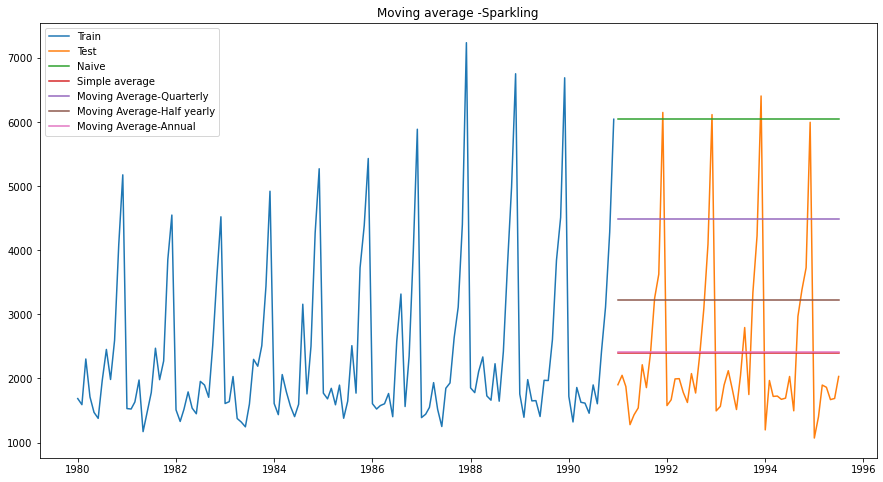

In [475]:
plt.plot(train_spark, label='Train')
plt.plot(test_spark.Sparkling, label='Test')
plt.plot(test_spark.Predicted_Naive, label='Naive')
plt.plot(test_spark['Simple Average'], label='Simple average')
plt.plot(test_spark.MA_Q, label='Moving Average-Quarterly')
plt.plot(test_spark.MA_H, label='Moving Average-Half yearly')
plt.plot(test_spark.MA_A, label='Moving Average-Annual')
plt.title("Moving average -Sparkling")

plt.legend()

In [476]:
MA_Q_score=np.sqrt(mean_squared_error(sparkling1_test.Sparkling, sparkling1_test.MA_Q))
MA_H_score=np.sqrt(mean_squared_error(sparkling1_test.Sparkling, sparkling1_test.MA_H))
MA_A_score=np.sqrt(mean_squared_error(sparkling1_test.Sparkling, sparkling1_test.MA_A))

Results_sparkling=Results_sparkling.append({"Method":'Moving_Average_Quarterly', "RMSE_score":MA_Q_score},ignore_index=True)
Results_sparkling=Results_sparkling.append({"Method":'Moving_Average_Half-yearly', "RMSE_score":MA_H_score},ignore_index=True)
Results_sparkling=Results_sparkling.append({"Method":'Moving_Average_Annually', "RMSE_score":MA_A_score},ignore_index=True)

In [477]:
Results_sparkling

,Method,RMSE_score
0,LR_sparkling_score,1389.135175
1,Naive_score,3864.279352
2,Simple_Average,1275.081804
3,Moving_Average_Quarterly,2443.002638
4,Moving_Average_Half-yearly,1521.611250
5,Moving_Average_Annually,1275.168862


#### b. Rose wine

In [478]:
rose1_train=rose1[rose1.index<'1991']
rose1_test=rose1[rose1.index>='1991']

In [479]:
rose1_train["MA_Q"]=rose1_train.Rose.rolling(3).mean()# Moving average of quarterly production
rose1_train["MA_H"]=rose1_train.Rose.rolling(6).mean()# Moving average of quarterly production
rose1_train["MA_A"]=rose1_train.Rose.rolling(12).mean()# Moving average of quarterly production
display(sparkling1_train.tail())

,Sparkling,MA_Q,MA_H,MA_A
Year_Month,,,,
1990-08-01,1605,1653.666667,1677.166667,2563.750000
1990-09-01,2424,1976.000000,1771.333333,2548.416667
1990-10-01,3116,2381.666667,2019.333333,2487.666667
1990-11-01,4286,3275.333333,2464.500000,2468.666667
1990-12-01,6047,4483.000000,3229.500000,2414.750000


In [480]:
rose1_test['MA_Q']=rose1_train.iloc[-1,1]
rose1_test['MA_H']=rose1_train.iloc[-1,2]
rose1_test['MA_A']=rose1_train.iloc[-1,3]

In [481]:
test_rose["MA_Q"]=rose1_test["MA_Q"]
test_rose["MA_H"]=rose1_test["MA_H"]
test_rose["MA_A"]=rose1_test["MA_A"]
test_rose.head()

,Rose,Predicted_Naive,Simple Average,MA_Q,MA_H,MA_A
Year_Month,,,,,,
1991-01-01,54.0,132.0,104.939394,102.333333,89.666667,78.75
1991-02-01,55.0,132.0,104.939394,102.333333,89.666667,78.75
1991-03-01,66.0,132.0,104.939394,102.333333,89.666667,78.75
1991-04-01,65.0,132.0,104.939394,102.333333,89.666667,78.75
1991-05-01,60.0,132.0,104.939394,102.333333,89.666667,78.75


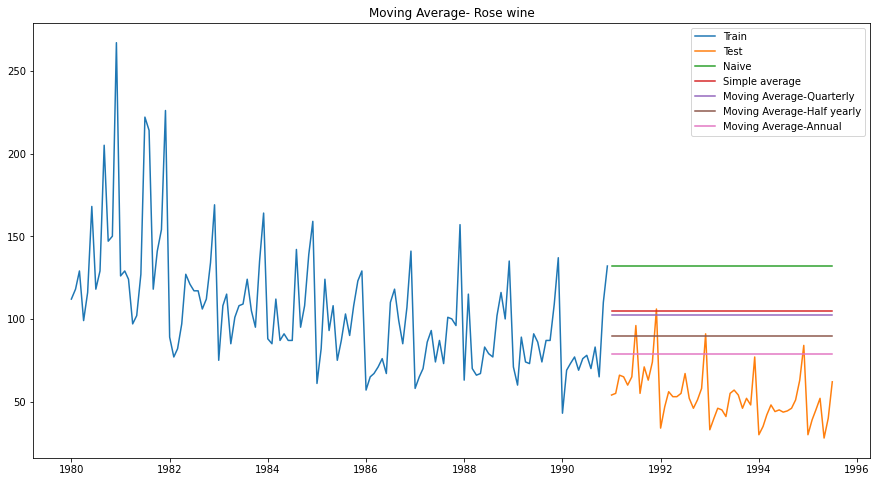

In [482]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose.Rose, label='Test')
plt.plot(test_rose.Predicted_Naive, label='Naive')
plt.plot(test_rose['Simple Average'], label='Simple average')
plt.plot(test_rose.MA_Q, label='Moving Average-Quarterly')
plt.plot(test_rose.MA_H, label='Moving Average-Half yearly')
plt.plot(test_rose.MA_A, label='Moving Average-Annual')
plt.title("Moving Average- Rose wine")

plt.legend()

In [483]:
MA_Q_score=np.sqrt(mean_squared_error(rose1_test.Rose, rose1_test.MA_Q))
MA_H_score=np.sqrt(mean_squared_error(rose1_test.Rose, rose1_test.MA_H))
MA_A_score=np.sqrt(mean_squared_error(rose1_test.Rose, rose1_test.MA_A))

Results_rose=Results_rose.append({"Method":'Moving_Average_Quarterly', "RMSE_score":MA_Q_score},ignore_index=True)
Results_rose=Results_rose.append({"Method":'Moving_Average_Half-yearly', "RMSE_score":MA_H_score},ignore_index=True)
Results_rose=Results_rose.append({"Method":'Moving_Average_Annually', "RMSE_score":MA_A_score},ignore_index=True)

In [484]:
Results_rose

,Method,RMSE_score
0,LR_sparkling_score,15.291197
1,Naive_score,79.777253
2,Simple_Average,53.520722
3,Moving_Average_Quarterly,51.036460
4,Moving_Average_Half-yearly,39.187774
5,Moving_Average_Annually,29.526100


## Model 5 :Simple Exponential Smoothing

#### a. Sparkling wine

In [485]:
SES_sparkling_=SimpleExpSmoothing(train_spark)
SES_sparkling=SES_sparkling_.fit(optimized=True)

In [486]:
test_spark['predicted_SES']=SES_sparkling.forecast(len(test_spark))

Text(0.5, 1.0, 'Predicted test data for Simple Exponential Smoothing model-Sparkling')

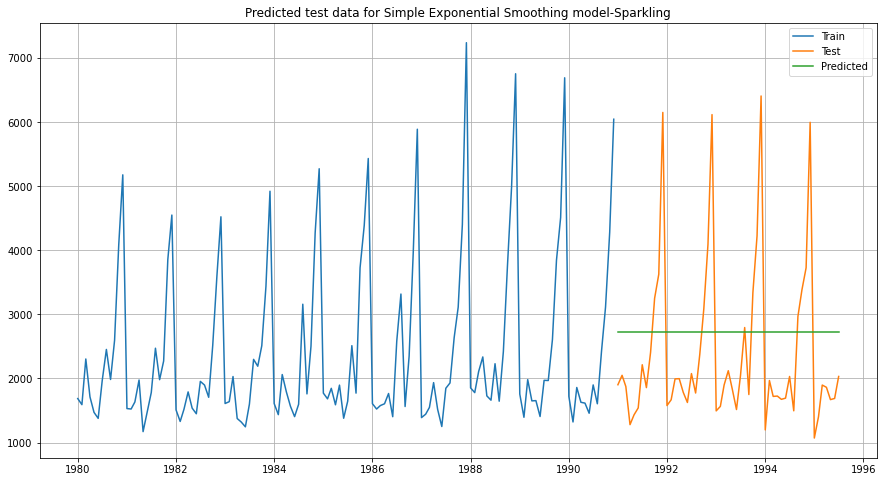

In [487]:
plt.plot(train_spark.Sparkling, label="Train")
plt.plot(test_spark.Sparkling, label="Test")
plt.plot(test_spark.predicted_SES, label='Predicted')
plt.grid()
plt.legend()
plt.title("Predicted test data for Simple Exponential Smoothing model-Sparkling")

In [488]:
SES_rmse=np.sqrt(mean_squared_error(test_spark.Sparkling, test_spark.predicted_SES))

In [489]:
Results_sparkling=Results_sparkling.append({"Method":'SES_score', "RMSE_score":SES_rmse},ignore_index=True)

In [490]:
Results_sparkling

,Method,RMSE_score
0,LR_sparkling_score,1389.135175
1,Naive_score,3864.279352
2,Simple_Average,1275.081804
3,Moving_Average_Quarterly,2443.002638
4,Moving_Average_Half-yearly,1521.611250
5,Moving_Average_Annually,1275.168862
6,SES_score,1316.034674


#### b.Rose wine

In [491]:
SES_rose_=SimpleExpSmoothing(train_rose)
SES_rose=SES_rose_.fit(optimized=True)


In [492]:
test_rose['predicted_SES']=SES_rose.forecast(len(test_rose))

Text(0.5, 1.0, 'Predicted test data for Simple Exponential Smoothing model-Rose')

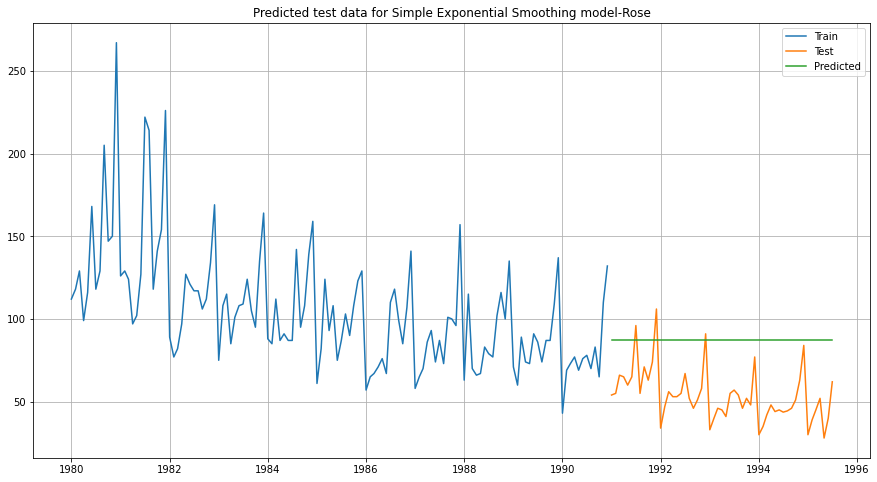

In [493]:
plt.plot(train_rose.Rose, label="Train")
plt.plot(test_rose.Rose, label="Test")
plt.plot(test_rose.predicted_SES, label='Predicted')
plt.grid()
plt.legend()
plt.title("Predicted test data for Simple Exponential Smoothing model-Rose")

In [494]:
SES_rmse=np.sqrt(mean_squared_error(test_rose.Rose, test_rose.predicted_SES))

In [495]:
Results_rose=Results_rose.append({"Method":'SES_score', "RMSE_score":SES_rmse},ignore_index=True)

In [496]:
Results_rose

,Method,RMSE_score
0,LR_sparkling_score,15.291197
1,Naive_score,79.777253
2,Simple_Average,53.520722
3,Moving_Average_Quarterly,51.036460
4,Moving_Average_Half-yearly,39.187774
5,Moving_Average_Annually,29.526100
6,SES_score,36.857735


## Model 6 :Double Exponential Smoothing

#### a. Sparkling wine

In [497]:
model_DES=Holt(train_spark, initialization_method='estimated').fit(optimized=True)

In [498]:
test_spark['predicted_DES']=model_DES.forecast(len(test_spark))

Text(0.5, 1.0, 'Predicted test data for Double Exponential Smoothing model-sparkling')

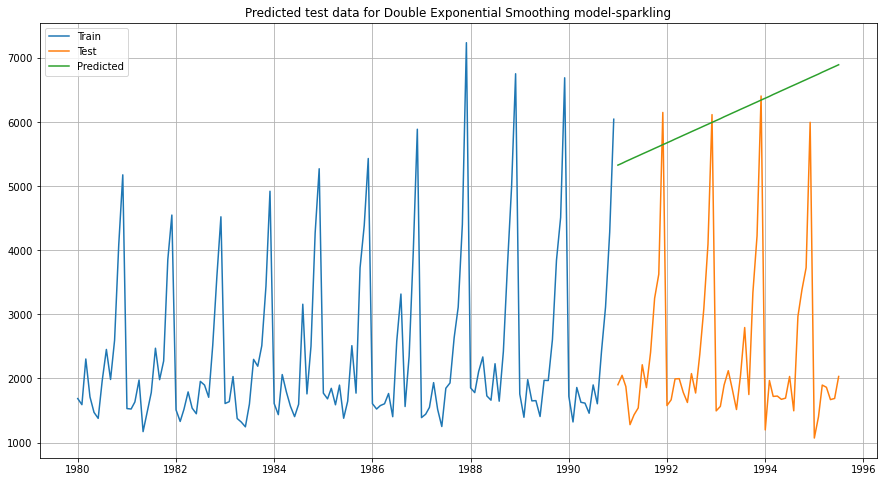

In [499]:
plt.plot(train_spark.Sparkling, label="Train")
plt.plot(test_spark.Sparkling, label="Test")
plt.plot(test_spark.predicted_DES, label='Predicted')
plt.grid()
plt.legend()
plt.title("Predicted test data for Double Exponential Smoothing model-sparkling")

In [500]:
DES_score=np.sqrt(mean_squared_error(test_spark.Sparkling, test_spark.predicted_DES))

In [501]:
Results_sparkling=Results_sparkling.append({"Method":'DES_score', "RMSE_score":DES_score},ignore_index=True)

In [502]:
Results_sparkling

,Method,RMSE_score
0,LR_sparkling_score,1389.135175
1,Naive_score,3864.279352
2,Simple_Average,1275.081804
3,Moving_Average_Quarterly,2443.002638
4,Moving_Average_Half-yearly,1521.611250
5,Moving_Average_Annually,1275.168862
6,SES_score,1316.034674
7,DES_score,3949.993290


#### b.Rose wine

In [503]:
model_DES=Holt(train_rose, initialization_method='estimated').fit(optimized=True)

In [504]:
test_rose['predicted_DES']=model_DES.forecast(len(test_rose))

Text(0.5, 1.0, 'Predicted test data for Double Exponential Smoothing model-Rose wine')

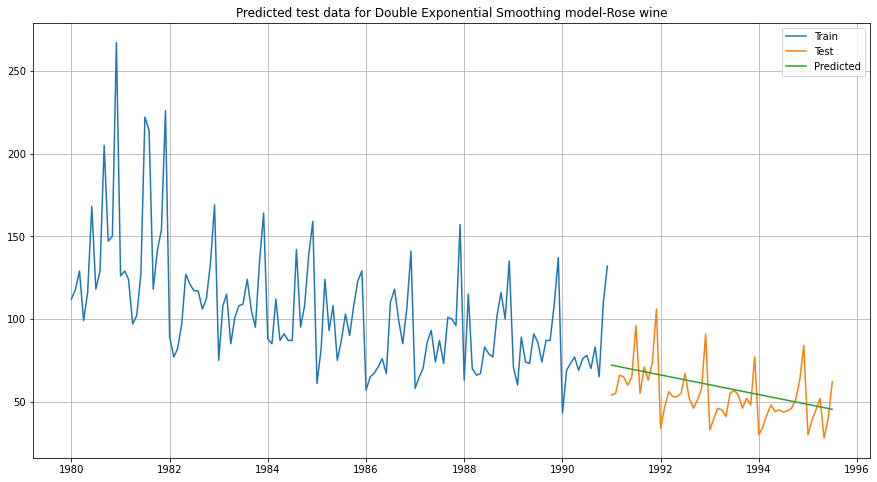

In [505]:
plt.plot(train_rose.Rose, label="Train")
plt.plot(test_rose.Rose, label="Test")
plt.plot(test_rose.predicted_DES, label='Predicted')
plt.grid()
plt.legend()
plt.title("Predicted test data for Double Exponential Smoothing model-Rose wine")

In [506]:
DES_score=np.sqrt(mean_squared_error(test_rose.Rose, test_rose.predicted_DES))

In [507]:
Results_rose=Results_rose.append({"Method":'DES_score', "RMSE_score":DES_score},ignore_index=True)

In [508]:
Results_rose

,Method,RMSE_score
0,LR_sparkling_score,15.291197
1,Naive_score,79.777253
2,Simple_Average,53.520722
3,Moving_Average_Quarterly,51.036460
4,Moving_Average_Half-yearly,39.187774
5,Moving_Average_Annually,29.526100
6,SES_score,36.857735
7,DES_score,15.291574


## Model 7 :Tripple Exponential Smoothing

#### a.Sparkling Wine

In [509]:
model_TES=ExponentialSmoothing(train_spark,trend='additive', seasonal='additive', initialization_method='estimated').fit(optimized=True)

In [510]:
test_spark["Predicted_TES"]=model_TES.forecast(len(test_spark))

Text(0.5, 1.0, 'Predicted test data for Tripple Exponential Smoothing model-sparkling')

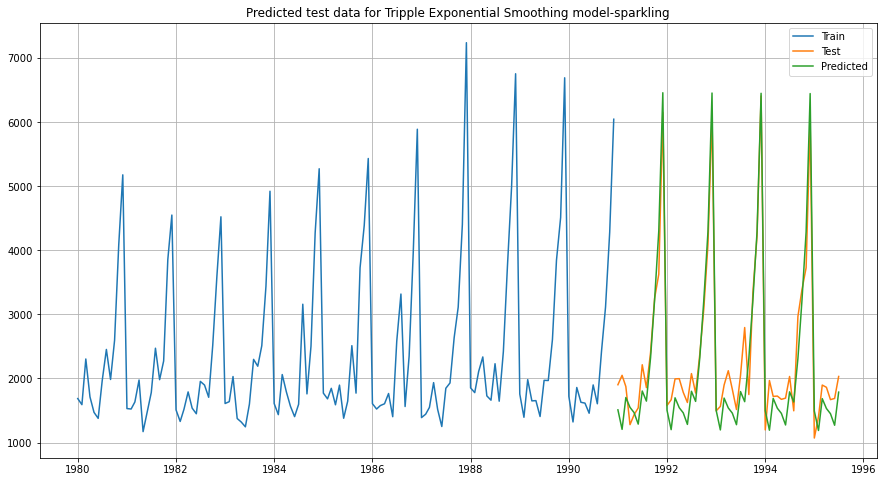

In [511]:
plt.plot(train_spark.Sparkling, label="Train")
plt.plot(test_spark.Sparkling, label="Test")
plt.plot(test_spark.Predicted_TES, label='Predicted')
plt.grid()
plt.legend()
plt.title("Predicted test data for Tripple Exponential Smoothing model-sparkling")

In [512]:
TES_score=np.sqrt(mean_squared_error(test_spark.Sparkling, test_spark.Predicted_TES))

In [513]:
Results_sparkling=Results_sparkling.append({"Method":'TES_score', "RMSE_score":TES_score},ignore_index=True)

In [514]:
Results_sparkling

,Method,RMSE_score
0,LR_sparkling_score,1389.135175
1,Naive_score,3864.279352
2,Simple_Average,1275.081804
3,Moving_Average_Quarterly,2443.002638
4,Moving_Average_Half-yearly,1521.611250
5,Moving_Average_Annually,1275.168862
6,SES_score,1316.034674
7,DES_score,3949.993290
8,TES_score,379.695686


#### a.Rose Wine

In [515]:
model_TES_=ExponentialSmoothing(train_rose,trend='additive', seasonal='additive', initialization_method='estimated')
model_TES=model_TES_.fit(optimized=True)

In [516]:
test_rose["Predicted_TES"]=model_TES.forecast(len(test_rose))

Text(0.5, 1.0, 'Predicted test data for Tripple Exponential Smoothing model-Rose')

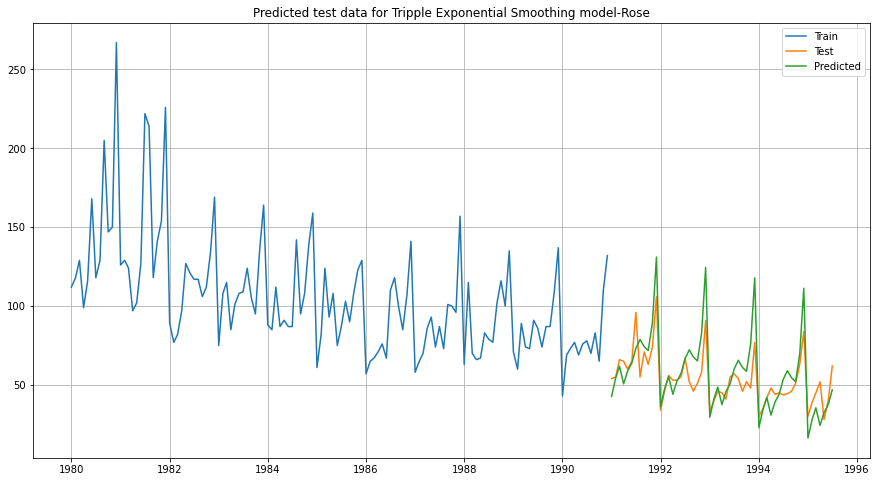

In [517]:
plt.plot(train_rose.Rose, label="Train")
plt.plot(test_rose.Rose, label="Test")
plt.plot(test_rose.Predicted_TES, label='Predicted')
plt.grid()
plt.legend()
plt.title("Predicted test data for Tripple Exponential Smoothing model-Rose")

In [518]:
TES_score=np.sqrt(mean_squared_error(test_rose.Rose, test_rose.Predicted_TES))

In [519]:
Results_rose=Results_rose.append({"Method":'TES_score', "RMSE_score":TES_score},ignore_index=True)

In [520]:
Results_rose

,Method,RMSE_score
0,LR_sparkling_score,15.291197
1,Naive_score,79.777253
2,Simple_Average,53.520722
3,Moving_Average_Quarterly,51.036460
4,Moving_Average_Half-yearly,39.187774
5,Moving_Average_Annually,29.526100
6,SES_score,36.857735
7,DES_score,15.291574
8,TES_score,14.307325


### 5.	Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a given time series is stationary or not. The ADF test has a null hypothesis and an alternative hypothesis.

The null hypothesis (H0) of the ADF test is that the time series is non-stationary, meaning that it has a unit root. In other words, the time series has a trend and/or seasonality, and its statistical properties such as mean and variance are not constant over time.

The alternative hypothesis (H1) of the ADF test is that the time series is stationary, meaning that it does not have a unit root. In other words, the time series does not have a trend and/or seasonality, and its statistical properties such as mean and variance are constant over time.

To conduct the ADF test, the test statistic is calculated and compared to critical values based on the null hypothesis. If the test statistic is less than the critical value, the null hypothesis is rejected, and we conclude that the time series is stationary. If the test statistic is greater than the critical value, we fail to reject the null hypothesis and conclude that the time series is non-stationary.


The test is to be conducted at 5% level of significance (i.e.  α  = 0.05) which is standard practice.

In [128]:
from statsmodels.tsa.stattools import adfuller

In [129]:
#ADFuller for sparkling wine data:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(train_spark.Sparkling, autolag='AIC')
adfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
print (adfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



#### SInce the p-value(0.6697) is much higher than the significance level, the sparkling wine data is clearly non-stationary

In [130]:
#ADFuller for rose wine data:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(train_rose, autolag='AIC')
adfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
print (adfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



#### SInce the p-value(0.2194) is much higher than the significance level, the rose wine data is clearly non-stationary

In [131]:
## To address the non-stationarity in the data, we can take the difference of the data.

In [132]:
train_spark_diff=train_spark.Sparkling.diff().dropna()
train_rose_diff=train_rose.Rose.diff().dropna()

In [133]:
print("result of the Dickey-Fuller test:")
dftest = adfuller(train_spark_diff, autolag='AIC')
adfoutput = pd.Series(dftest[0:4], index=["Test-statistics", 'p-value', '#Lags used', 'No.of obs used'])
for key, value in dftest[4].items():
    adfoutput[f'critical value for {key}% is '] = value
print(adfoutput)

if adfoutput['p-value']<0.05:
    print(f"Since p-value is {(adfoutput['p-value'])} which is much smaller than the significance level(0.05),the null hypothesis of the ADFuller test is to be rejected and n\
    the series created out of first order of difference is stationary")
else :
    print(f"Since p-value is {adfoutput['p-value']} which is still higher than the significance level(0.05),the null hypothesis of the ADFuller can't be rejected and n\
    the series created out of first order of difference is stationary")
    


result of the Dickey-Fuller test:
Test-statistics               -8.005007e+00
p-value                        2.280104e-12
#Lags used                     1.100000e+01
No.of obs used                 1.190000e+02
critical value for 1%% is     -3.486535e+00
critical value for 5%% is     -2.886151e+00
critical value for 10%% is    -2.579896e+00
dtype: float64
Since p-value is 2.280104355826498e-12 which is much smaller than the significance level(0.05),the null hypothesis of the ADFuller test is to be rejected and n    the series created out of first order of difference is stationary


In [134]:
print("result of the Dickey-Fuller test:")
dftest = adfuller(train_rose_diff, autolag='AIC')
adfoutput = pd.Series(dftest[0:4], index=["Test-statistics", 'p-value', '#Lags used', 'No.of obs used'])
for key, value in dftest[4].items():
    adfoutput[f'critical value for {key}% is '] = value
print(adfoutput)

if adfoutput['p-value']<0.05:
    print(f"Since p-value is {(adfoutput['p-value'])} which is much smaller than the significance level(0.05),the null hypothesis of the ADFuller test is to be rejected and n\
    the series created out of first order of difference is stationary")
else :
    print(f"Since p-value is {adfoutput['p-value']} which is still higher than the significance level(0.05),the null hypothesis of the ADFuller can't be rejected and n\
    the series created out of first order of difference is stationary")
    


result of the Dickey-Fuller test:
Test-statistics               -6.592372e+00
p-value                        7.061944e-09
#Lags used                     1.200000e+01
No.of obs used                 1.180000e+02
critical value for 1%% is     -3.487022e+00
critical value for 5%% is     -2.886363e+00
critical value for 10%% is    -2.580009e+00
dtype: float64
Since p-value is 7.061943750942673e-09 which is much smaller than the significance level(0.05),the null hypothesis of the ADFuller test is to be rejected and n    the series created out of first order of difference is stationary


### conclusion- First order differencing makes both the sparkling wine and rose wine time series data into stationary.

### 6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### a.Sparkling wine

In [521]:
aic=pd.DataFrame(columns=['model','order','seasonal_order','aic'])
from statsmodels.tsa.arima.model import ARIMA

#Preparing an ARIMA based model
import itertools
p=q=range(3)
d=range(2)
pdq=list(itertools.product(p,d,q))
for i in pdq:
    model=ARIMA(train_spark.Sparkling,order=i).fit()
    model_aic=model.aic
    aic=aic.append({'model':'ARIMA','order':i,'aic':model_aic}, ignore_index=True)

In [522]:
aic.sort_values(by='aic')

,model,order,seasonal_order,aic
17,ARIMA,"(2, 1, 2)",NaN,2213.509217
16,ARIMA,"(2, 1, 1)",NaN,2233.777626
5,ARIMA,"(0, 1, 2)",NaN,2234.408323
11,ARIMA,"(1, 1, 2)",NaN,2234.527200
10,ARIMA,"(1, 1, 1)",NaN,2235.755095
13,ARIMA,"(2, 0, 1)",NaN,2236.590860
12,ARIMA,"(2, 0, 0)",NaN,2244.811782
1,ARIMA,"(0, 0, 1)",NaN,2245.312136
2,ARIMA,"(0, 0, 2)",NaN,2245.347184
7,ARIMA,"(1, 0, 1)",NaN,2246.005400


The AIC value is a measure of the relative quality of a statistical model, based on the goodness of fit and the complexity of the model. In general, a lower AIC value indicates a better fit to the data, with a trade-off between the goodness of fit and the complexity of the model.

In this case, the (2,1,2) ARIMA model has the lowest AIC value of 2213.5092 among all the models tested. This suggests that it provides a good balance between model complexity and goodness of fit to the data, and is the best among the models considered for predicting future values of the time series.

In [523]:
best_ARIMA=ARIMA(train_spark.Sparkling,order=(2,1,2)).fit()
test_spark['forecast_ARIMA']=best_ARIMA.get_forecast(len(test_spark)).predicted_mean
rmse=mean_squared_error(test_spark.Sparkling,test_spark.forecast_ARIMA, squared=False)
best_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 09 Apr 2023   AIC                           2213.509
Time:                        19:57:24   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.786      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.731      0.000      -0.701      -0.417
ma.L1         -1.9916      0.110    -18.184      0.000      -2.206      -1.777
ma.L2          0.9999      0.110      9.093      0.000       0.784       1.215
sigma2      1.099e+06      2e-07   5.49e+12      0.000     1.1e+06     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                14.46
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.58e+27. Standard errors may be unstable.
"""

In [524]:
Results_sparkling=Results_sparkling.append({"Method":'ARIMA_score', "RMSE_score":rmse},ignore_index=True)

In [525]:
Results_sparkling

,Method,RMSE_score
0,LR_sparkling_score,1389.135175
1,Naive_score,3864.279352
2,Simple_Average,1275.081804
3,Moving_Average_Quarterly,2443.002638
4,Moving_Average_Half-yearly,1521.611250
5,Moving_Average_Annually,1275.168862
6,SES_score,1316.034674
7,DES_score,3949.993290
8,TES_score,379.695686
9,ARIMA_score,1299.980373


<AxesSubplot:xlabel='Year_Month'>

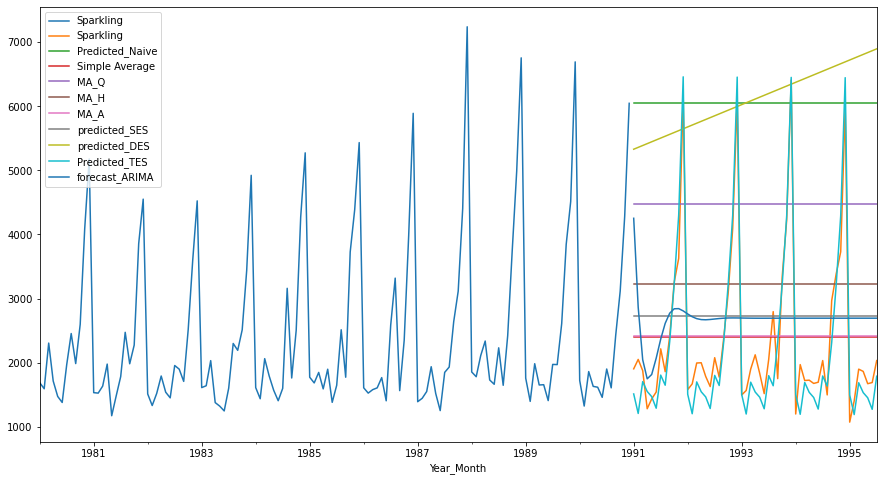

In [526]:
ax1=train_spark.plot(label='train')
test_spark.plot(ax=ax1)

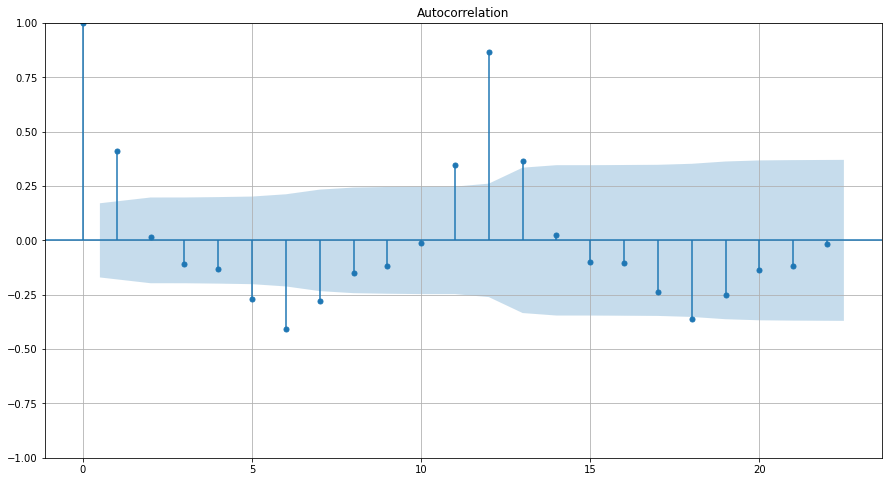

In [527]:
#before finding the best parameters for SARIMA, we need to ascertain the seasonal cycle length. 
#We can find this out by plotting the aucto correlation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(train_spark);
plt.grid()

Thus the maximum acf is seen at an interval of 12 months.Hence, the seasonal cycle is taken as 12 months

In [388]:
# preparing SARIMA based model
import statsmodels.api as sm

PDQ=[(x[0],x[1],x[2],12) for x in pdq]

for i in pdq:
    for j in PDQ:
        model_SARIMA=sm.tsa.statespace.SARIMAX(train_spark.Sparkling,
                                            order=i,
                                            seasonal_order=j,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit(maxiter=1000)
        model_aic=model_SARIMA.aic
        aic=aic.append({'model':'SARIMA','order':i,'seasonal_order':j,'aic':model_aic}, ignore_index=True)
        

In [390]:
aic.sort_values(by='aic').dropna()

,model,order,seasonal_order,aic
221,SARIMA,"(1, 1, 2)","(0, 1, 2, 12)",1382.347780
113,SARIMA,"(0, 1, 2)","(0, 1, 2, 12)",1382.484254
227,SARIMA,"(1, 1, 2)","(1, 1, 2, 12)",1384.137874
329,SARIMA,"(2, 1, 2)","(0, 1, 2, 12)",1384.317618
119,SARIMA,"(0, 1, 2)","(1, 1, 2, 12)",1384.398867
...,...,...,...,...
72,SARIMA,"(0, 1, 0)","(0, 0, 0, 12)",2251.359720
126,SARIMA,"(1, 0, 0)","(0, 0, 0, 12)",2263.076105
54,SARIMA,"(0, 0, 2)","(0, 0, 0, 12)",2278.506917
36,SARIMA,"(0, 0, 1)","(0, 0, 0, 12)",2337.107016


In [528]:
best_SARIMA=sm.tsa.statespace.SARIMAX(train_spark.Sparkling,
                                            order=(1,1,2),
                                            seasonal_order=(0,1,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit(maxiter=1000)

In [529]:
best_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sun, 09 Apr 2023   AIC                           1382.348
Time:                                    19:57:45   BIC                           1397.479
Sample:                                01-01-1980   HQIC                          1388.455
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235     -0.687      0.492      -0.621       0.299
ma.L2         -0.7218      0.175     -4.132      0.000      -1.064      -0.379
ma.S.L12      -0.4062      0.092     -4.401      0.000      -0.587      -0.225
ma.S.L24      -0.0274      0.138     -0.198      0.843      -0.298       0.243
sigma2      1.705e+05   2.45e+04      6.956      0.000    1.22e+05    2.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.48
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.60
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [530]:
test_spark['forecast_SARIMA']=best_SARIMA.get_forecast(len(test_spark)).predicted_mean
test_spark.head()

,Sparkling,Predicted_Naive,Simple Average,MA_Q,MA_H,MA_A,predicted_SES,predicted_DES,Predicted_TES,forecast_ARIMA,forecast_SARIMA
Year_Month,,,,,,,,,,,
1991-01-01,1902,6047,2403.780303,4483.0,3229.5,2414.75,2724.929339,5330.501799,1509.969093,4252.375165,1460.244629
1991-02-01,2049,6047,2403.780303,4483.0,3229.5,2414.75,2724.929339,5359.520204,1205.343244,2863.125145,1392.437178
1991-03-01,1874,6047,2403.780303,4483.0,3229.5,2414.75,2724.929339,5388.538609,1702.386113,2043.997950,1743.201695
1991-04-01,1279,6047,2403.780303,4483.0,3229.5,2414.75,2724.929339,5417.557013,1548.514691,1746.212954,1650.066940
1991-05-01,1432,6047,2403.780303,4483.0,3229.5,2414.75,2724.929339,5446.575418,1467.824074,1813.620943,1522.656026


In [531]:
rmse=mean_squared_error(test_spark.Sparkling,test_spark.forecast_SARIMA, squared=False)

In [532]:
rmse

382.57671641413503

In [533]:
Results_sparkling=Results_sparkling.append({"Method":'SARIMA_score', "RMSE_score":rmse},ignore_index=True)

In [534]:
Results_sparkling

,Method,RMSE_score
0,LR_sparkling_score,1389.135175
1,Naive_score,3864.279352
2,Simple_Average,1275.081804
3,Moving_Average_Quarterly,2443.002638
4,Moving_Average_Half-yearly,1521.611250
5,Moving_Average_Annually,1275.168862
6,SES_score,1316.034674
7,DES_score,3949.993290
8,TES_score,379.695686
9,ARIMA_score,1299.980373


#### b.Rose wine

In [535]:
aic=pd.DataFrame(columns=['model','order','seasonal_order','aic'])
from statsmodels.tsa.arima.model import ARIMA

#Preparing an ARIMA based model
import itertools
p=q=range(3)
d=range(2)
pdq=list(itertools.product(p,d,q))
for i in pdq:
    model=ARIMA(train_rose.Rose,order=i).fit()
    model_aic=model.aic
    aic=aic.append({'model':'ARIMA','order':i,'aic':model_aic}, ignore_index=True)

In [536]:
aic.sort_values(by='aic')

,model,order,seasonal_order,aic
5,ARIMA,"(0, 1, 2)",NaN,1279.671529
11,ARIMA,"(1, 1, 2)",NaN,1279.870723
10,ARIMA,"(1, 1, 1)",NaN,1280.574230
16,ARIMA,"(2, 1, 1)",NaN,1281.507862
17,ARIMA,"(2, 1, 2)",NaN,1281.870722
4,ARIMA,"(0, 1, 1)",NaN,1282.309832
8,ARIMA,"(1, 0, 2)",NaN,1292.053213
14,ARIMA,"(2, 0, 2)",NaN,1292.248056
13,ARIMA,"(2, 0, 1)",NaN,1292.937195
7,ARIMA,"(1, 0, 1)",NaN,1294.510585


The AIC value is a measure of the relative quality of a statistical model, based on the goodness of fit and the complexity of the model. In general, a lower AIC value indicates a better fit to the data, with a trade-off between the goodness of fit and the complexity of the model.

In this case, the (0,1,2) ARIMA model has the lowest AIC value of 1279.67 among all the models tested. This suggests that it provides a good balance between model complexity and goodness of fit to the data, and is the best among the models considered for predicting future values of the time series.

In [537]:
best_ARIMA=ARIMA(train_rose.Rose,order=(0,1,2)).fit()
test_rose['forecast_ARIMA']=best_ARIMA.get_forecast(len(test_rose)).predicted_mean
rmse=mean_squared_error(test_rose.Rose,test_rose.forecast_ARIMA, squared=False)
best_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 09 Apr 2023   AIC                           1279.672
Time:                        19:58:08   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.000     792.766    1138.915
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                39.24
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [538]:
Results_rose=Results_rose.append({"Method":'ARIMA_score', "RMSE_score":rmse},ignore_index=True)

In [539]:
Results_rose

,Method,RMSE_score
0,LR_sparkling_score,15.291197
1,Naive_score,79.777253
2,Simple_Average,53.520722
3,Moving_Average_Quarterly,51.036460
4,Moving_Average_Half-yearly,39.187774
5,Moving_Average_Annually,29.526100
6,SES_score,36.857735
7,DES_score,15.291574
8,TES_score,14.307325
9,ARIMA_score,37.367689


<AxesSubplot:xlabel='Year_Month'>

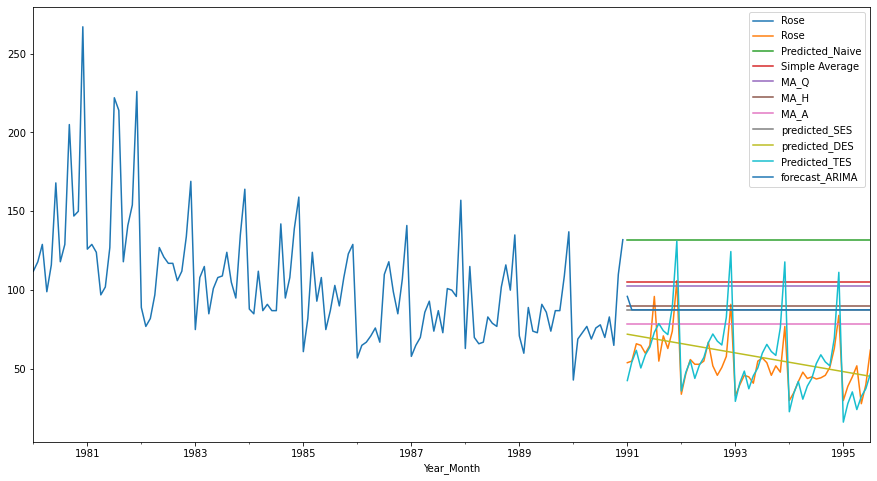

In [540]:
ax1=train_rose.plot(label='train')
test_rose.plot(ax=ax1)

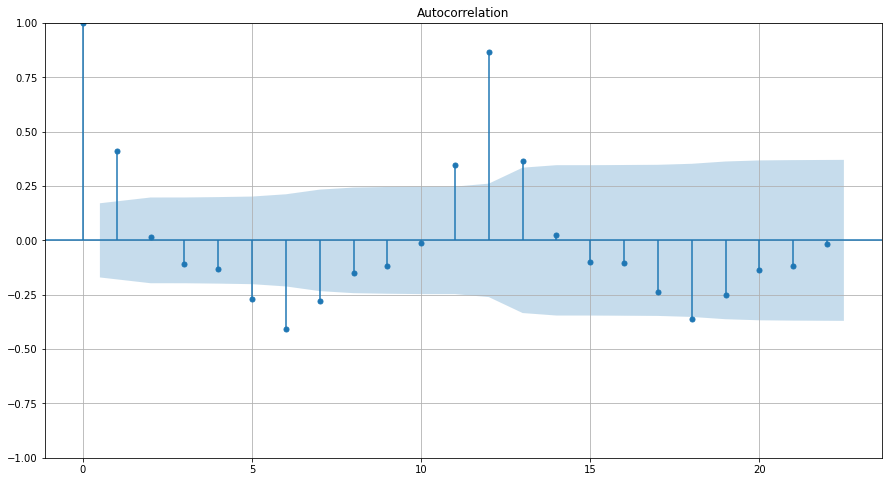

In [541]:
#before finding the best parameters for SARIMA, we need to ascertain the seasonal cycle length. 
#We can find this out by plotting the aucto correlation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(train_spark);
plt.grid()

Thus the maximum acf is seen at an interval of 12 months.Hence, the seasonal cycle is taken as 12 months

In [423]:
# preparing SARIMA based model
import statsmodels.api as sm

PDQ=[(x[0],x[1],x[2],12) for x in pdq]

for i in pdq:
    for j in PDQ:
        model_SARIMA=sm.tsa.statespace.SARIMAX(train_rose.Rose,
                                            order=i,
                                            seasonal_order=j,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit(maxiter=1000)
        model_aic=model_SARIMA.aic
        aic=aic.append({'model':'SARIMA','order':i,'seasonal_order':j,'aic':model_aic}, ignore_index=True)
        

In [425]:
aic.sort_values(by='aic')

,model,order,seasonal_order,aic
125,SARIMA,"(0, 1, 2)","(2, 1, 2, 12)",774.969119
233,SARIMA,"(1, 1, 2)","(2, 1, 2, 12)",776.940110
341,SARIMA,"(2, 1, 2)","(2, 1, 2, 12)",776.996099
287,SARIMA,"(2, 0, 2)","(2, 1, 2, 12)",780.716942
179,SARIMA,"(1, 0, 2)","(2, 1, 2, 12)",780.992968
...,...,...,...,...
3,ARIMA,"(0, 1, 0)",NaN,1333.154673
19,SARIMA,"(0, 0, 0)","(0, 0, 1, 12)",1342.887980
54,SARIMA,"(0, 0, 2)","(0, 0, 0, 12)",1426.844550
36,SARIMA,"(0, 0, 1)","(0, 0, 0, 12)",1481.819865


In [542]:
best_SARIMA=sm.tsa.statespace.SARIMAX(train_rose.Rose,
                                            order=(0,1,2),
                                            seasonal_order=(2,1,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit(maxiter=1000)

In [543]:
best_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 09 Apr 2023   AIC                            774.969
Time:                                    19:58:34   BIC                            792.622
Sample:                                01-01-1980   HQIC                           782.094
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126     -0.605      0.545      -0.324       0.171
ar.S.L12       0.0480      0.177      0.271      0.786      -0.299       0.395
ar.S.L24      -0.0419      0.028     -1.513      0.130      -0.096       0.012
ma.S.L12      -0.7526      0.301     -2.503      0.012      -1.342      -0.163
ma.S.L24      -0.0721      0.204     -0.354      0.723      -0.472       0.327
sigma2       187.8657     45.274      4.149      0.000      99.130     276.602
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.86
Prob(Q):                              0.81   Prob(JB):                         0.09
Heteroskedasticity (H):               0.91   Skew:                             0.41
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [544]:
test_rose['forecast_SARIMA']=best_SARIMA.get_forecast(len(test_rose)).predicted_mean
test_rose.head()

,Rose,Predicted_Naive,Simple Average,MA_Q,MA_H,MA_A,predicted_SES,predicted_DES,Predicted_TES,forecast_ARIMA,forecast_SARIMA
Year_Month,,,,,,,,,,,
1991-01-01,54.0,132.0,104.939394,102.333333,89.666667,78.75,87.105001,72.064380,42.672382,96.026636,44.213835
1991-02-01,55.0,132.0,104.939394,102.333333,89.666667,78.75,87.105001,71.570005,54.439917,87.495114,62.326835
1991-03-01,66.0,132.0,104.939394,102.333333,89.666667,78.75,87.105001,71.075630,61.841877,87.495114,67.313479
1991-04-01,65.0,132.0,104.939394,102.333333,89.666667,78.75,87.105001,70.581254,50.636896,87.495114,63.161117
1991-05-01,60.0,132.0,104.939394,102.333333,89.666667,78.75,87.105001,70.086879,58.918913,87.495114,66.474263


In [545]:
rmse=mean_squared_error(test_rose.Rose,test_rose.forecast_SARIMA, squared=False)

In [546]:
rmse

16.55597774608589

In [547]:
Results_rose=Results_rose.append({"Method":'SARIMA_score', "RMSE_score":rmse},ignore_index=True)

In [431]:
Results_rose

,Method,RMSE_score
0,LR_sparkling_score,15.291197
1,Naive_score,79.777253
2,Simple_Average,53.520722
3,Moving_Average_Quarterly,51.036460
4,Moving_Average_Half-yearly,39.187774
5,Moving_Average_Annually,29.526100
6,SES_score,36.857735
7,DES_score,15.291574
8,ARIMA_score,37.367689
9,SARIMA_score,16.555978


### 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

#### a. Sparkling wine

In [548]:
Results_sparkling=round(Results_sparkling.sort_values(by='RMSE_score').reset_index(drop=True),2)
Results_sparkling


,Method,RMSE_score
0,TES_score,379.70
1,SARIMA_score,382.58
2,Simple_Average,1275.08
3,Moving_Average_Annually,1275.17
4,ARIMA_score,1299.98
5,SES_score,1316.03
6,LR_sparkling_score,1389.14
7,Moving_Average_Half-yearly,1521.61
8,Moving_Average_Quarterly,2443.00
9,Naive_score,3864.28


#### b. Rose wine

In [174]:
Results_rose=round(Results_rose.sort_values(by='RMSE_score').reset_index(drop=True),2)
Results_rose

,Method,RMSE_score
0,TES_score,14.31
1,LR_sparkling_score,15.29
2,DES_score,15.29
3,SARIMA_score,16.56
4,Moving_Average_Annually,29.53
5,SES_score,36.86
6,ARIMA_score,37.37
7,Moving_Average_Half-yearly,39.19
8,Moving_Average_Quarterly,51.04
9,Simple_Average,53.52


### 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Thus the best performing model is Tripple Exponential Smoothing model.We shall use this model to predict 12 months into future

#### a.Sparkling wine

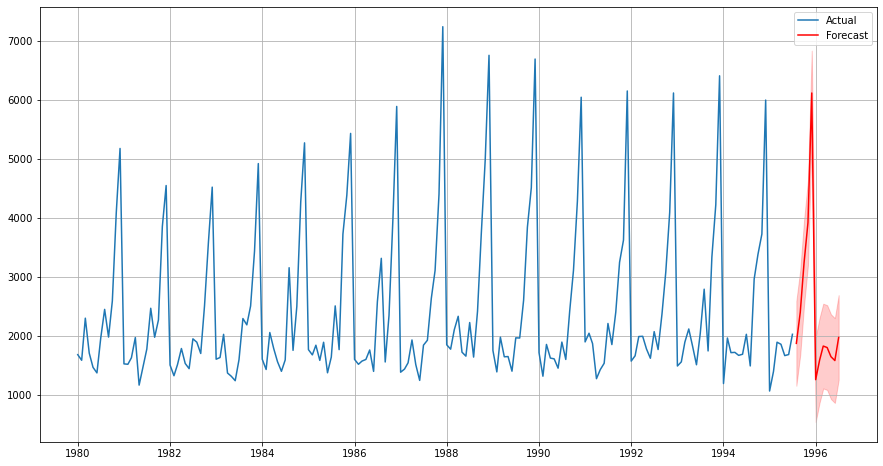

In [196]:
model = ExponentialSmoothing(sparkling, trend='additive', seasonal='additive', seasonal_periods=12)
fit = model.fit()

# Get forecast and confidence intervals
forecast = fit.forecast(steps=12)
residuals = fit.resid.to_numpy()

# Compute covariance matrix of residuals
cov_mat = np.cov(residuals.reshape(-1, 1), rowvar=False)

# Compute standard error of forecast
if cov_mat.ndim == 0:
    std_err = np.sqrt(cov_mat)
else:
    std_err = np.sqrt(cov_mat[0][0])

# Compute confidence intervals
alpha = 0.05
z_score = 1.96 # for 95% confidence interval
lower_ci = forecast - z_score * std_err
upper_ci = forecast + z_score * std_err

# Create DataFrame with forecast and confidence intervals
result = pd.DataFrame({'forecast': forecast, 'lower_ci': lower_ci, 'upper_ci': upper_ci})
result=round(result,2)

import matplotlib.pyplot as plt

# Plot the time series with forecast and confidence intervals
ax1 = plt.plot(sparkling.index, sparkling, label='Actual')
plt.plot(result.index, result['forecast'], label='Forecast', color='r')
plt.fill_between(result.index, result['lower_ci'], result['upper_ci'], alpha=0.2, color='r')
plt.grid()
plt.legend()
plt.show()


can the data be checked after log transformation?

In [197]:
result

,forecast,lower_ci,upper_ci
1995-08-01,1877.42,1159.49,2595.34
1995-09-01,2405.27,1687.35,3123.20
1995-10-01,3242.09,2524.17,3960.02
1995-11-01,3922.17,3204.25,4640.10
1995-12-01,6118.49,5400.56,6836.41
1996-01-01,1262.60,544.68,1980.53
1996-02-01,1592.12,874.20,2310.05
1996-03-01,1831.64,1113.71,2549.56
1996-04-01,1806.45,1088.53,2524.38
1996-05-01,1651.70,933.78,2369.63


#### b.Rose wine

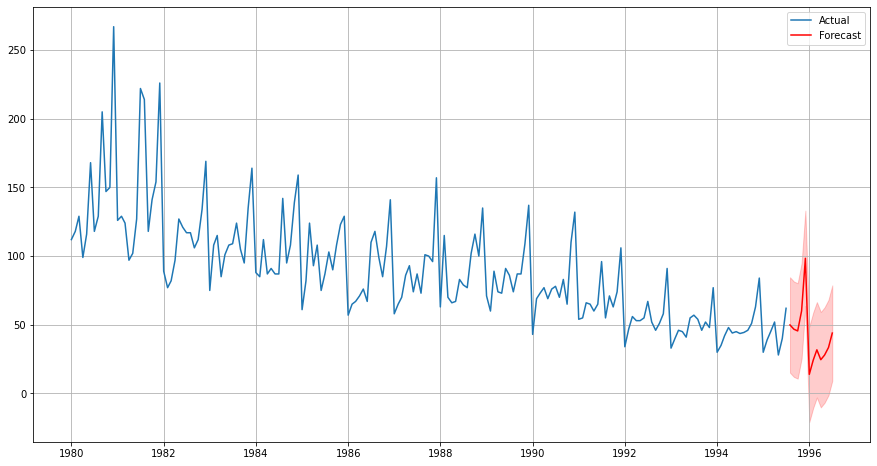

In [193]:
model = ExponentialSmoothing(rose, trend='additive', seasonal='additive', seasonal_periods=12)
fit = model.fit()

# Get forecast and confidence intervals
forecast = fit.forecast(steps=12)
residuals = fit.resid.to_numpy()

# Compute covariance matrix of residuals
cov_mat = np.cov(residuals.reshape(-1, 1), rowvar=False)

# Compute standard error of forecast
if cov_mat.ndim == 0:
    std_err = np.sqrt(cov_mat)
else:
    std_err = np.sqrt(cov_mat[0][0])

# Compute confidence intervals
alpha = 0.05
z_score = 1.96 # for 95% confidence interval
lower_ci = forecast - z_score * std_err
upper_ci = forecast + z_score * std_err

# Create DataFrame with forecast and confidence intervals
result = pd.DataFrame({'forecast': forecast, 'lower_ci': lower_ci, 'upper_ci': upper_ci})
result=round(result,2)

import matplotlib.pyplot as plt

# Plot the time series with forecast and confidence intervals
ax1 = plt.plot(rose.index, rose.Rose, label='Actual')
plt.plot(result.index, result['forecast'], label='Forecast', color='r')
plt.fill_between(result.index, result['lower_ci'], result['upper_ci'], alpha=0.2, color='r')
plt.grid()
plt.legend()
plt.show()

In [195]:
result

,forecast,lower_ci,upper_ci
1995-08-01,49.87,15.14,84.59
1995-09-01,46.77,12.05,81.49
1995-10-01,45.53,10.81,80.25
1995-11-01,60.13,25.41,94.85
1995-12-01,98.39,63.67,133.11
1996-01-01,13.92,-20.80,48.64
1996-02-01,24.22,-10.50,58.94
1996-03-01,31.78,-2.94,66.50
1996-04-01,24.57,-10.15,59.29
1996-05-01,27.96,-6.77,62.68


### 9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

#### a. Sparkling wine

In [198]:
sparkling_model_params=model.params
sparkling_model_params
df_spark=pd.DataFrame(sparkling_model_params)
df_spark

,smoothing_level,smoothing_trend,smoothing_seasonal,damping_trend,initial_level,initial_trend,initial_seasons,use_boxcox,lamda,remove_bias
0,0.075967,0.032569,0.376608,NaN,2356.500977,-1.036274,-636.253180,False,None,False
1,0.075967,0.032569,0.376608,NaN,2356.500977,-1.036274,-723.000287,False,None,False
2,0.075967,0.032569,0.376608,NaN,2356.500977,-1.036274,-398.670515,False,None,False
3,0.075967,0.032569,0.376608,NaN,2356.500977,-1.036274,-473.454564,False,None,False
4,0.075967,0.032569,0.376608,NaN,2356.500977,-1.036274,-808.431956,False,None,False
5,0.075967,0.032569,0.376608,NaN,2356.500977,-1.036274,-815.368673,False,None,False
6,0.075967,0.032569,0.376608,NaN,2356.500977,-1.036274,-384.247693,False,None,False
7,0.075967,0.032569,0.376608,NaN,2356.500977,-1.036274,72.999995,False,None,False
8,0.075967,0.032569,0.376608,NaN,2356.500977,-1.036274,-237.461260,False,None,False
9,0.075967,0.032569,0.376608,NaN,2356.500977,-1.036274,272.345483,False,None,False


brief explanation of each of the important parameters:

smoothing_level: This  parameter in the triple exponential smoothing model,  controls the smoothing or weighting of the current observation compared to the past observations in determining the level or baseline of the time series.In this case, 'smoothing_level': 0.07596713833847582 indicates that the current observation has been moderately smoothed with a weight of 0.075, while the remaining weight of 0.925 is given to the previous observations.

Thus the latest sales level is having only only 7.5% importance in foreasting the expected sales level next, while 92.5% is attributed to sales level of even earlier times.

smoothing_trend: This parameter in the triple exponential smoothing model, controls the smoothing or weighting of the current trend estimate compared to the past trend estimates in determining the trend of the time series.In this example, 'smoothing_trend': 0.03256922042142542 indicates that the current trend estimate has been moderately smoothed with a weight of 0.032, while the remaining weight of 0.968 is given to the previous trend estimates.

Thus the latest sales level is having only only 3.2% importance in foreasting the expected sales level next, while 96.8% is attributed to sales level of even earlier times.


smoothing_seasonal: This parameter in the triple exponential smoothing model, which controls the smoothing or weighting of the seasonal component of the time series.This parameter determines the degree to which the current seasonal estimate is smoothed and how much weight is given to it in estimating the current seasonal component. In this example, 'smoothing_seasonal': 0.37660763013263704 indicates that the seasonal cycle has 37.60% wight , while the remaining weight of 0.624 is given to the previous seasonal estimates. This parameter can be particularly useful for forecasting seasonal patterns in the data, such as sales during particular time of the year or holiday seasons etc.


conclusion:
The future sales level is moderately affected by the level and trend of current time as compared to the current seasonal cycle.This is also confirmed from the monthly plot of sales data which shows that for every year under reference between September and December, the level of sales significantly rises.Thus the company should be well prepared to meet the increased demand during this time in future years by ramping up production and stocking up reserves well before this time.



### b.Rose wine

In [187]:
rose_model_params=model.params
df_rose=pd.DataFrame(rose_model_params)
df_rose

,smoothing_level,smoothing_trend,smoothing_seasonal,damping_trend,initial_level,initial_trend,initial_seasons,use_boxcox,lamda,remove_bias
0,0.097868,1.447548e-08,0.000001,NaN,145.798533,-0.538283,-28.013891,False,None,False
1,0.097868,1.447548e-08,0.000001,NaN,145.798533,-0.538283,-17.176608,False,None,False
2,0.097868,1.447548e-08,0.000001,NaN,145.798533,-0.538283,-9.079812,False,None,False
3,0.097868,1.447548e-08,0.000001,NaN,145.798533,-0.538283,-15.748038,False,None,False
4,0.097868,1.447548e-08,0.000001,NaN,145.798533,-0.538283,-11.827408,False,None,False
5,0.097868,1.447548e-08,0.000001,NaN,145.798533,-0.538283,-5.806570,False,None,False
6,0.097868,1.447548e-08,0.000001,NaN,145.798533,-0.538283,5.262528,False,None,False
7,0.097868,1.447548e-08,0.000001,NaN,145.798533,-0.538283,5.238871,False,None,False
8,0.097868,1.447548e-08,0.000001,NaN,145.798533,-0.538283,2.682143,False,None,False
9,0.097868,1.447548e-08,0.000001,NaN,145.798533,-0.538283,1.977016,False,None,False
